# Creating the Delaney dataset

Task: calculating the ESOL (solvation energy) predicted or measured from the data. This dataset comes with some features already. I'll add the extras in, we can chose to use them or not later. Is a nice regression task. 

Idea to try: each time you get a conformer, the conformer is in a slightly different place. So lets do 60 unwrappings of the first conformer, and do 60 unwrappings of a different conformer each time? Perhaps as two datasets for ease of use? I think as two datasets atm, for ease of not making a mistake with the dataset.

So, one dataset is standard, 60 unfoldings per molecule, the other is 120. 

Hopefully, this task requires some sort of shape information

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot
import matplotlib.tri 
import rdkit.Chem
import rdkit.Chem.AllChem as Chem
import rdkit.Chem.AllChem as AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
import mpl_toolkits.mplot3d
import operator
import functools
import os
import gif
import h5py
import scipy.linalg
import slugify
import sys
import random

from skspatial.objects import Point, Vector, Triangle
from operator import attrgetter
from scipy.constants import golden
from IPython.display import HTML

import projection
from projection.molecule import Molecule
from projection.face import Face

from projection.ico import Ico

In [2]:
save_dir=r'e:\Nextcloud\science\Datasets'
data_dir=r'e:\Nextcloud\science\Datasets'
input_file='BBBP.csv'
input_file_location=os.path.join(data_dir, input_file)
df = pd.read_csv(input_file_location)
SMILES_array=df['smiles']
SMILES_array[4]
df.head()

,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...


## Tests that the molecules are loaded correctly etc

name    24
Name: 3, dtype: object


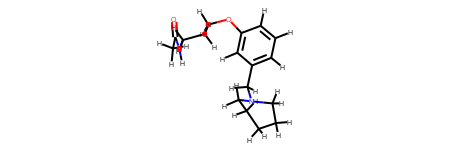

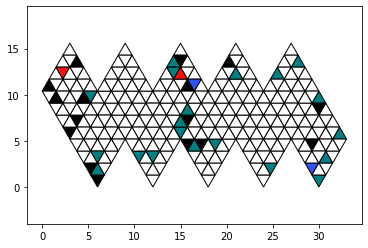

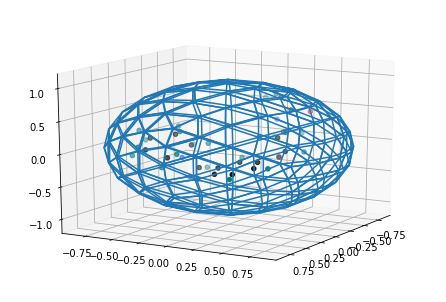

In [3]:
idx=3
print(df[['name']].iloc[idx])
# This optimises and does adds Hs, also rotates and centers the molecule
m=Molecule(df[['smiles']].iloc[idx][0])
# creates the ico projection object
i = Ico(m,2)
# draws a 2D unfolding
i.draw2D()
# draws a 3D unfolding
i.draw3D()
# gives the chemical structure in standard format
m.molecule

In [4]:
smiles_string = SMILES_array[0]
sanitize=True
# Parse the molecule
if True:
        base_m = rdkit.Chem.MolFromSmiles(smiles_string, sanitize=sanitize)
        base_m.UpdatePropertyCache()
        rdkit.Chem.AllChem.EmbedMolecule(base_m)
        # Add the hydrogens
        molecule = rdkit.Chem.AddHs(base_m)
        rdkit.Chem.AllChem.EmbedMolecule(molecule)
        # use MMFF94 to minimise and make a nice structure
        rdkit.Chem.AllChem.MMFFOptimizeMolecule(molecule)

        # get a conformer, any conformer and parse it.
        conformer = molecule.GetConformers()[0]
        #self._parse_conformer()

        atom_count = conformer.GetNumAtoms()

        # get molefile
        #mol_file = rdkit.Chem.MolToMolBlock(molecule)
        #self.atom_list = Molecule._atoms_from_mol_file(mol_file, self.atom_count)
        #self.colour_list = Molecule.get_atom_colour_list(self.atom_list)#

        #self.molecule = molecule
        #self.smiles = smiles_string


In [5]:
cp=conformer.GetPositions()
len(np.where(~cp.any(axis=1))[0])

1

In [6]:
cp

array([[ 0.        ,  0.        ,  0.        ],
       [-5.91894097,  0.54008525, -1.17179693],
       [-4.87182442, -0.3707892 , -0.52785501],
       [-5.31449882, -0.75124824,  0.88606877],
       [-3.58859639,  0.34350845, -0.54323559],
       [-2.44198183, -0.52583624, -0.22587143],
       [-1.13488919,  0.26077686, -0.4431786 ],
       [-1.14302787,  0.78349143, -1.78129573],
       [ 0.09305631, -0.63592866, -0.23944112],
       [ 1.25133531,  0.19599991, -0.1178479 ],
       [ 2.45615966, -0.41049146,  0.14776403],
       [ 2.63990475, -1.79648541,  0.20159103],
       [ 3.89606024, -2.33044218,  0.48442268],
       [ 4.97974889, -1.48605022,  0.71391116],
       [ 4.8267121 , -0.09374227,  0.65968646],
       [ 5.9235496 ,  0.75484222,  0.88736345],
       [ 5.78141507,  2.14116861,  0.8316176 ],
       [ 4.54081522,  2.69756534,  0.54639738],
       [ 3.44192739,  1.86664411,  0.318942  ],
       [ 3.55492975,  0.45968262,  0.37094226],
       [-6.89049694,  0.03648595, -1.222

In [7]:
df[['smiles']].iloc[idx][0]

'C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C'

name    Propanolol
Name: 0, dtype: object


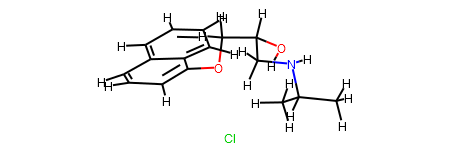

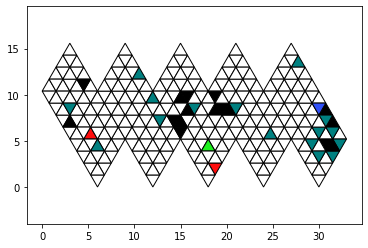

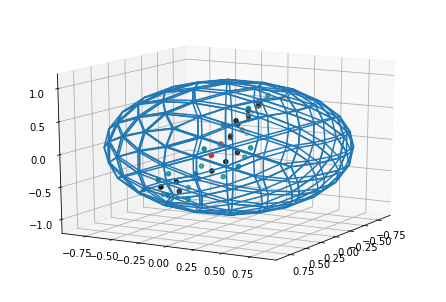

In [8]:
idx=0
print(df[['name']].iloc[idx])
# This optimises and does adds Hs, also rotates and centers the molecule
m=Molecule(df[['smiles']].iloc[idx][0], sanitize=False)
# creates the ico projection object
i = Ico(m,2)
# draws a 2D unfolding
i.draw2D()
# draws a 3D unfolding
i.draw3D()
# gives the chemical structure in standard format
m.molecule

In [9]:
n(ccc1)c(c1)CCNC

SyntaxError: invalid syntax (<ipython-input-9-117c59f54cac>, line 1)

In [ ]:
smiles_string='c1(nc(NC(N)[NH2])sc1)CSCCNC([NH]C#N)NC'
smiles_string=SMILES_array[1998]

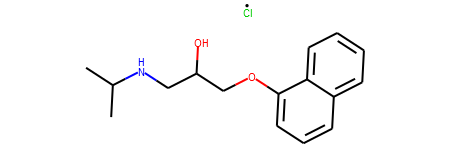

In [10]:
rdkit.Chem.MolFromSmiles(smiles_string, sanitize=True)

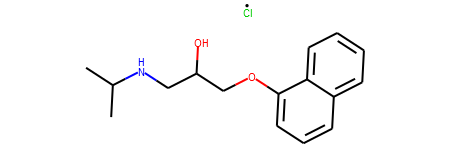

In [11]:
egg=rdkit.Chem.MolFromSmiles(smiles_string, sanitize=False)
egg.UpdatePropertyCache(strict=False)
rdkit.Chem.SanitizeMol(egg, rdkit.Chem.SanitizeFlags.SANITIZE_FINDRADICALS | rdkit.Chem.SanitizeFlags.SANITIZE_KEKULIZE | rdkit.Chem.SanitizeFlags.SANITIZE_SETAROMATICITY | rdkit.Chem.SanitizeFlags.SANITIZE_SETCONJUGATION | rdkit.Chem.SanitizeFlags.SANITIZE_SETHYBRIDIZATION | rdkit.Chem.SanitizeFlags.SANITIZE_SYMMRINGS, catchErrors=True)
egg

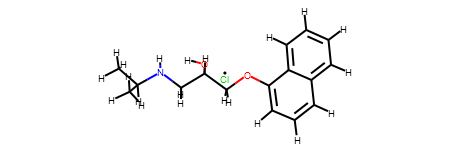

In [12]:
molecule

Cc1nc(sc1)\[NH]=C(\N)N
hi


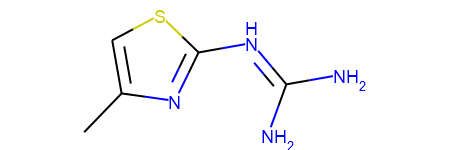

In [104]:
smiles_string=SMILES_array[Failures[2]]
print(smiles_string)
base_m = rdkit.Chem.MolFromSmiles(smiles_string, sanitize=True)
if base_m is None:
    print('hi')
    base_m = rdkit.Chem.MolFromSmiles(smiles_string, sanitize=False)
    base_m.UpdatePropertyCache(strict=False)
    rdkit.Chem.SanitizeMol(base_m, rdkit.Chem.SanitizeFlags.SANITIZE_FINDRADICALS | rdkit.Chem.SanitizeFlags.SANITIZE_KEKULIZE | rdkit.Chem.SanitizeFlags.SANITIZE_SETAROMATICITY | rdkit.Chem.SanitizeFlags.SANITIZE_SETCONJUGATION | rdkit.Chem.SanitizeFlags.SANITIZE_SETHYBRIDIZATION | rdkit.Chem.SanitizeFlags.SANITIZE_SYMMRINGS, catchErrors=True)
else:
    base_m.UpdatePropertyCache()
base_m
#rdkit.Chem.AllChem.EmbedMolecule(base_m)
# Add the hydrogens
#molecule = rdkit.Chem.AddHs(base_m)
#rdkit.Chem.AllChem.EmbedMolecule(molecule, )
# use MMFF94 to minimise and make a nice structure
#rdkit.Chem.AllChem.MMFFOptimizeMolecule(molecule)
#base_m


In [14]:
molecule.GetConformer()

ValueError: Bad Conformer Id

In [ ]:
df.head()

##### Code to write out the commands for the script
Yes I am sure there is a better way to do this

In [ ]:
#### This writes out the commands we need, so we can copy and paste below
## there must be a better way of doing this!
def df_maker(column_list, verbose=True):    
    for header in column_list:
        # this makes the dfs
        cmd = "%s_ds = %s%s%s" % (
                slugify.slugify(header, separator="_"), 
                "outfile.create_dataset('",
                header, 
                "', (smile_count*NUM_MAPS_PER_MOLECULE,))")
        if verbose:
            print(cmd)
    return cmd

def df_writer(column_list,current_row):
    verbose=True
    for header in column_list:
        # this makes the dfs
        cmd1 = "%s = %s%s%s" % (
                slugify.slugify(header, separator="_"), 
                "current_row.iloc[0]['",
                header, 
                "']")
        cmd2 = "%s_ds[point_ptr] = %s" % (
                slugify.slugify(header, separator="_"),
                slugify.slugify(header, separator="_"))

        if verbose:
            print(cmd1)
            print(cmd2)
    return (cmd1, cmd2)

#### The function to write the hdf5 file

In [81]:

def Create_Diff_Conformer_Dataset_From_SMILES(DIVISION, 
                   save_dir, 
                   data_dir, 
                   out_filename, 
                   do_Hdonors,
                   ico_key_name,
                   num_of_molecules_override=0,
                   NUM_MAPS_PER_MOLECULE=60,
                   sanitize=True,
                   SMILES_array=[],
                   num_out_files=1,
                   extra_augmentation='conformer',
                   verbose=False,
                   num_of_working_smiles=0):
    """ Creates the dataset as a hdf5 file
    DIVISION =4 # for the size of icospehre  
    save_dir=r'C:\\Users\\ella_\\Nextcloud\\science\\Datasets\\converted_pdbbind\\v2015'
    data_dir=r'C:\\Users\\ella_\\Nextcloud\\science\\Datasets\\pdbbind\\v2015'
    out_filename = "PDBBindLigands_core_augmented_withHs_withHdonors_div4.hdf5"
    do_Hdonors = True/False, whether to do the H donor data or not, don't do it for proteins
    ico_key_name_name = "icosahedron_level4"
    num_of_molecules_override: 0, how many molecules to do, a setting of 0 does all of them
    NUM_MAPS_PER_MOLECULE # how many maps to create, anything over 60 will be augmented
    sanitize=True
    SMILES_array= an array of smiles, set this up from df or fix this 
    num_out_files=1 not yet implemented
    extra_augmentation='conformer' other options not yet implemented!
    verbose=False
    num_of_working_smiles=0, if not all the smiles can be created or embedded, 
    run once with a single map and get the number of failuers
    """


    if num_of_molecules_override == 0:
        # do all smiles woo
        Num_of_molecules= len(SMILES_array)
    else:
        Num_of_molecules = num_of_molecules_override
        
    smiles_count = Num_of_molecules
    if not num_of_working_smiles == 0:
        smile_count = num_of_working_smiles # this is used to create the correct sized hdf5 file
    else: 
        smiles_count = Num_of_molecules # this is used to count how many molecules to read in and attempt to run
        # Yes I know it could be clearer!


    if DIVISION == 1:
        NUM_FACES = 80
    elif DIVISION == 2:
        NUM_FACES = 320
    elif DIVISION == 3:
        NUM_FACES = 1280
    elif DIVISION == 4:
        NUM_FACES = 5120
        
    if NUM_MAPS_PER_MOLECULE == 1:
        NUM_UNWRAPPINGS_TO_DO = 1
        NUM_DIRECTIONS_TO_DO = 1
        NUM_EXTRA_MAPS_PER_MOLECULE = 0
    elif NUM_MAPS_PER_MOLECULE == 60:
        NUM_UNWRAPPINGS_TO_DO = 20
        NUM_DIRECTIONS_TO_DO = 3
        NUM_EXTRA_MAPS_PER_MOLECULE = 0
    elif NUM_MAPS_PER_MOLECULE > 60:
        # Currently assumes you want 60 plus extra
        NUM_UNWRAPPINGS_TO_DO = 20
        NUM_DIRECTIONS_TO_DO = 3
        NUM_EXTRA_MAPS_PER_MOLECULE = NUM_MAPS_PER_MOLECULE-60
        if verbose:
            print('Doing {} extra maps using {}s'.format(
                NUM_EXTRA_MAPS_PER_MOLECULE, 
                extra_augmentation))  
    
    if sanitize:
        print('Warning! Sanitize seems to muck up the structures, especially for protiens')
        print('Is good for SMILES string input however')
    
    outfile = h5py.File(os.path.join(save_dir,out_filename),"w")
    if NUM_EXTRA_MAPS_PER_MOLECULE > 0:
        outfile_expanded = h5py.File(os.path.join(save_dir,out_filename + '_extra_' + extra_augmentation),"w")
    string_type = h5py.string_dtype(encoding='utf-8')
    icosahedron_name = ico_key_name

    ##################### set up the out put datasets ################################
    ## this sets up the output datasets
    icosahedron_ds =  outfile.create_dataset(icosahedron_name, (smile_count*NUM_MAPS_PER_MOLECULE, NUM_FACES, 3))  
    #charge_ds = outfile.create_dataset("charge", (smile_count*NUM_MAPS_PER_MOLECULE,))
    molID_ds = outfile.create_dataset("molID", (smile_count*NUM_MAPS_PER_MOLECULE,))
    ## from the dataset
    name_ds = outfile.create_dataset('name', (smile_count*NUM_MAPS_PER_MOLECULE,), dtype=string_type)
    num_ds = outfile.create_dataset('num', (smile_count*NUM_MAPS_PER_MOLECULE,), dtype=np.uint8)
    p_np_ds = outfile.create_dataset('p_np', (smile_count*NUM_MAPS_PER_MOLECULE,), dtype=np.uint8)
    smiles_ds = outfile.create_dataset('smiles', (smile_count*NUM_MAPS_PER_MOLECULE,), dtype=string_type)
    ### end from the dataset
    ### start calculated by rdkit
    num_atoms_ds = outfile.create_dataset("num_atoms", (smile_count*NUM_MAPS_PER_MOLECULE,))
    num_bonds_ds = outfile.create_dataset("num_bonds", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    num_heavy_atoms_ds = outfile.create_dataset("num_heavy_atoms", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    num_exact_Mol_Wt_ds = outfile.create_dataset("num_exact_Mol_Wt", (smile_count*NUM_MAPS_PER_MOLECULE,))
    MolLogP_ds = outfile.create_dataset("MolLogP", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    if do_Hdonors:
        num_H_acceptors_ds = outfile.create_dataset("num_H_acceptors", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
        num_H_donors_ds = outfile.create_dataset("num_H_donors", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    num_heteroatoms_ds = outfile.create_dataset("num_ heteroatoms", (smile_count*NUM_MAPS_PER_MOLECULE,))
    num_valence_electrons_ds = outfile.create_dataset("num_valence_electrons", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    PMI_1_ds = outfile.create_dataset("PMI_1", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    PMI_2_ds = outfile.create_dataset("PMI_2", (smile_count*NUM_MAPS_PER_MOLECULE,))
    PMI_3_ds = outfile.create_dataset("PMI_3", (smile_count*NUM_MAPS_PER_MOLECULE,))
    spherocity_ds = outfile.create_dataset("spherocity", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    asphericity_ds = outfile.create_dataset("asphericity", (smile_count*NUM_MAPS_PER_MOLECULE,))
    eccentricity_ds = outfile.create_dataset("eccentricity", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    inertial_shape_factor_ds = outfile.create_dataset("inertial_shape_factor", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    radius_of_gyration_ds = outfile.create_dataset("radius_of_gyration", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    # copied from output of df_maker above sigh
    ### end from the dataset
    
    ######################### start the loop ###################################
    ## Das Loop
    point_ptr = -1
    failure_list = []
    for mol_idx in range(Num_of_molecules): 
        print(mol_idx)
        if mol_idx % 50 == 0:
            print('Got to Molecule no. ', mol_idx)
        ##### grab data from the dataframe
        current_row = df.loc[[mol_idx]]    
        ##### grab a molecule! #####################################
        try:
            m=Molecule(SMILES_array[mol_idx],sanitize=sanitize)
        except ImportError as e:
            print(e)
            failure_list.append(mol_idx)
            continue
        
        tidy_m = m
        tidy_m.molecule.UpdatePropertyCache() # this is now done in Molecule if you got SMILEs
        ############### put molecule in an icosasphere #############
        # puts the molecule into an icosasphere
        i = Ico(m,DIVISION)
        print(df['name'].iloc[mol_idx])
        if smiles_count > 0:
            smiles_string = SMILES_array[mol_idx]
        #############################################################################################
        ################################### THIS IS THE FIRST 60 NETS ###############################
        #############################################################################################
        for face_idx in range(NUM_UNWRAPPINGS_TO_DO): 
            for point_idx in range(NUM_DIRECTIONS_TO_DO): 
                point_ptr += 1
                #### create the map (this does not plot a graphics object)
                i.plot2D(first_face=face_idx, point_idx=point_idx);
                fs=i.get_face_list()
                #i.draw2D()
                #### ####### grab the atom values or colours or whatever############
                Face._lookup_func = Face.face_get_masses
                values = [f.get_values() for f in fs]
                ################ create the measurables you want to record #############
                values_as_array = np.array(values) # this is hte icosahedron stuff
                num_atoms = tidy_m.molecule.GetNumAtoms() # number of atoms
                num_bonds = tidy_m.molecule.GetNumBonds() # number of bonds
                num_heavy_atoms = tidy_m.molecule.GetNumHeavyAtoms() # number of non-hydrogens
                num_exact_Mol_Wt = Descriptors.ExactMolWt(tidy_m.molecule) # exact molar weight
                MolLogP = Descriptors.MolLogP(tidy_m.molecule, includeHs=True) # octanol / water partitian coefficient
                num_heteroatoms = Descriptors.NumHeteroatoms(tidy_m.molecule)
                num_valence_electrons = Descriptors.NumValenceElectrons(tidy_m.molecule)
                if do_Hdonors:
                    num_H_acceptors = Descriptors.NumHAcceptors(tidy_m.molecule)
                    num_H_donors = Descriptors.NumHDonors(tidy_m.molecule)
                PMI_1 = rdMolDescriptors.CalcPMI1(tidy_m.molecule) # principal moment of inertia 1 (smallest)
                PMI_2 = rdMolDescriptors.CalcPMI2(tidy_m.molecule) # principal moment of inertia 2
                PMI_3 = rdMolDescriptors.CalcPMI3(tidy_m.molecule) # principal moment of inertia 3
                spherocity = rdMolDescriptors.CalcSpherocityIndex(tidy_m.molecule)
                asphericity = rdMolDescriptors.CalcAsphericity(tidy_m.molecule)
                eccentricity = rdMolDescriptors.CalcEccentricity(tidy_m.molecule)
                inertial_shape_factor = rdMolDescriptors.CalcInertialShapeFactor(tidy_m.molecule)
                radius_of_gyration = rdMolDescriptors.CalcRadiusOfGyration(tidy_m.molecule)

                ############ assign measurabless to columns ##########################
                ###### assign unfolding net
                icosahedron_ds[point_ptr] = values_as_array 
                #charge_ds[point_ptr] = charge
                molID_ds[point_ptr] = mol_idx
                ###### assign stuff from the database
                name = current_row.iloc[0]['name']
                name_ds[point_ptr] = name
                num = current_row.iloc[0]['num']
                num_ds[point_ptr] = num
                p_np = current_row.iloc[0]['p_np']
                p_np_ds[point_ptr] = p_np
                smiles = current_row.iloc[0]['smiles']
                smiles_ds[point_ptr] = smiles
                ######## assign stuff you calculated ######
                num_atoms_ds[point_ptr] = num_atoms  
                num_bonds_ds[point_ptr] = num_bonds 
                num_heavy_atoms_ds[point_ptr] =  num_heavy_atoms 
                num_exact_Mol_Wt_ds[point_ptr] =  num_exact_Mol_Wt
                MolLogP_ds[point_ptr] =  MolLogP 
                if do_Hdonors:
                    num_H_acceptors_ds[point_ptr] =  num_H_acceptors 
                    num_H_donors_ds[point_ptr] =  num_H_donors 
                num_heteroatoms_ds[point_ptr] =  num_heteroatoms
                num_valence_electrons_ds[point_ptr] =  num_valence_electrons 
                PMI_1_ds[point_ptr] =  PMI_1 
                PMI_2_ds[point_ptr] =  PMI_2
                PMI_3_ds[point_ptr] =  PMI_3
                spherocity_ds[point_ptr] =  spherocity 
                asphericity_ds[point_ptr] =  asphericity
                eccentricity_ds[point_ptr] =  eccentricity 
                inertial_shape_factor_ds[point_ptr] =  inertial_shape_factor 
                radius_of_gyration_ds[point_ptr] =  radius_of_gyration 
        if verbose:
            print('Finished the 60 standard unfoldings')
        #############################################################################################
        ######################## THE EXTRA AUGMENTATION STARTS HERE !################################
        #############################################################################################
        for extra_idx in range(NUM_EXTRA_MAPS_PER_MOLECULE):
            ## this is it, regen the molecule each time you unwrap to move it about a bit!            
            m=Molecule(SMILES_array[mol_idx],sanitize=sanitize)           
            tidy_m = m
            for point_idx in range(1): # hacky cos I didn't want to indent!!!!!
                # we pick the face and direction randomly for this single unfolding
                face_idx = random.choices([x for x in range(NUM_UNWRAPPINGS_TO_DO)], k=1)[0]
                point_idx = random.choices([x for x in range(NUM_DIRECTIONS_TO_DO)], k=1)[0]
                if verbose:
                    print('Doing extra: face {}, direction {}'.format(face_idx, point_idx))
                point_ptr += 1
                #### create the map (this does not plot a graphics object)
                i.plot2D(first_face=face_idx, point_idx=point_idx);
                fs=i.get_face_list()
                #i.draw2D()
                #### ####### grab the atom values or colours or whatever############
                Face._lookup_func = Face.face_get_masses
                values = [f.get_values() for f in fs]
                ################ create the measurables you want to record #############
                values_as_array = np.array(values) # this is hte icosahedron stuff
                num_atoms = tidy_m.molecule.GetNumAtoms() # number of atoms
                num_bonds = tidy_m.molecule.GetNumBonds() # number of bonds
                num_heavy_atoms = tidy_m.molecule.GetNumHeavyAtoms() # number of non-hydrogens
                num_exact_Mol_Wt = Descriptors.ExactMolWt(tidy_m.molecule) # exact molar weight
                MolLogP = Descriptors.MolLogP(tidy_m.molecule, includeHs=True) # octanol / water partitian coefficient
                num_heteroatoms = Descriptors.NumHeteroatoms(tidy_m.molecule)
                num_valence_electrons = Descriptors.NumValenceElectrons(tidy_m.molecule)
                if do_Hdonors:
                    num_H_acceptors = Descriptors.NumHAcceptors(tidy_m.molecule)
                    num_H_donors = Descriptors.NumHDonors(tidy_m.molecule)
                PMI_1 = rdMolDescriptors.CalcPMI1(tidy_m.molecule) # principal moment of inertia 1 (smallest)
                PMI_2 = rdMolDescriptors.CalcPMI2(tidy_m.molecule) # principal moment of inertia 2
                PMI_3 = rdMolDescriptors.CalcPMI3(tidy_m.molecule) # principal moment of inertia 3
                spherocity = rdMolDescriptors.CalcSpherocityIndex(tidy_m.molecule)
                asphericity = rdMolDescriptors.CalcAsphericity(tidy_m.molecule)
                eccentricity = rdMolDescriptors.CalcEccentricity(tidy_m.molecule)
                inertial_shape_factor = rdMolDescriptors.CalcInertialShapeFactor(tidy_m.molecule)
                radius_of_gyration = rdMolDescriptors.CalcRadiusOfGyration(tidy_m.molecule)

                ############ assign measurabless to columns ##########################
                ###### assign unfolding net
                icosahedron_ds[point_ptr] = values_as_array 
                #charge_ds[point_ptr] = charge
                molID_ds[point_ptr] = mol_idx
                ###### assign stuff from the database
                name = current_row.iloc[0]['name']
                name_ds[point_ptr] = name
                num = current_row.iloc[0]['num']
                num_ds[point_ptr] = num
                p_np = current_row.iloc[0]['p_np']
                p_np_ds[point_ptr] = p_np
                smiles = current_row.iloc[0]['smiles']
                smiles_ds[point_ptr] = smiles
                ######## assign stuff you calculated ######
                num_atoms_ds[point_ptr] = num_atoms  
                num_bonds_ds[point_ptr] = num_bonds 
                num_heavy_atoms_ds[point_ptr] =  num_heavy_atoms 
                num_exact_Mol_Wt_ds[point_ptr] =  num_exact_Mol_Wt
                MolLogP_ds[point_ptr] =  MolLogP 
                if do_Hdonors:
                    num_H_acceptors_ds[point_ptr] =  num_H_acceptors 
                    num_H_donors_ds[point_ptr] =  num_H_donors 
                num_heteroatoms_ds[point_ptr] =  num_heteroatoms
                num_valence_electrons_ds[point_ptr] =  num_valence_electrons 
                PMI_1_ds[point_ptr] =  PMI_1 
                PMI_2_ds[point_ptr] =  PMI_2
                PMI_3_ds[point_ptr] =  PMI_3
                spherocity_ds[point_ptr] =  spherocity 
                asphericity_ds[point_ptr] =  asphericity
                eccentricity_ds[point_ptr] =  eccentricity 
                inertial_shape_factor_ds[point_ptr] =  inertial_shape_factor 
                radius_of_gyration_ds[point_ptr] =  radius_of_gyration 


    outfile.close()   
    #outfile_expanded.close()
    i.draw2D()
    print(f"Failures: {failure_list}")
    return

## THIS DOES THE DATASET BUILDING! 

In [21]:
# you get these failures by running hte code below once to find them! 
# Then you gotta rerun the function to create the actual database without any blank entries
# or fix the failures! :S
Failures=[59, 61, 391, 614, 642, 645, 646, 647, 648, 649, 685, 1998]

Warning! Sanitize seems to muck up the structures, especially for protiens
Is good for SMILES string input however
0
Got to Molecule no.  0
Propanolol
1
Terbutylchlorambucil
2
40730
3
24
4
cloxacillin
5
cefoperazone
6
rolitetracycline
7
ondansetron
8
diltiazem
9
Amiloride
10
M2L-663581
11
alovudine
12
18
13
24959
14
methadone
15
alfentanil
16
BRL53080
17
hyoscyamine
18
glyburide
19
lamotrigine
20
2-Methylpentane
21
Dexamfetamine
22
SKF-93619
23
nadolol
24
sufentanil
25
12
26
zolpidem
27
clozapine
28
Org12692
29
piperacillin
30
Pentobarbital
31
Levofloxacin
32
compound 40
33
RO19-4603
34
fentanyl
35
etomidate
36
11a
37
prochlorperazine
38
2-(3'-Iodo-4'-aminophenyl)-6-hydroxybenzothiazole
39
compound 34
40
granisetron
41
thiamphenicol
42
16
43
mexiletine
44
dextropropoxyphene
45
Nor-1-chlorpromazine
46
compound 37
47
cefamandole
48
Y-G 15
49
Org13011
50
Got to Molecule no.  50
Quinidine
51
38480
52
17
53
vinblastine
54
Bacitracin
55
Nor-2-chlorpromazine
56
compound 36
57
19
58
Y-G 14
59


487
Nor-2-chlorpromazine
488
doxylamine
489
EMD60400
490
enoxacin
491
fleroxacin
492
GR85571
493
GR88377
494
GR89696
495
bromazepam
496
buclizine
497
bufotenine
498
bupropion
499
buramate
500
Got to Molecule no.  500
butabarbital
501
caffeine
502
cannabidiol
503
capuride
504
carbamazepine
505
Northioridazine
506
Org13011
507
Paraxanthine
508
Pentane
509
Propanol
510
Propanone
511
GR89696_et
512
GR89696_pr
513
GR91272
514
GR94839
515
GR94839_A
516
GR94839_B
517
GR94839_C
518
GR94839_D
519
GR94839_E
520
GR94839_F
521
carphenazine
522
cartazolate
523
centazolone
524
chloralhydrate
525
chlordiazepoxide
526
chlorpromazine
527
chlorprothixene
528
chlorzoxazone
529
choline
530
clobazam
531
RO19-4603
532
SKF101468
533
SKF89124
534
Salicyluricacid
535
Sulforidazine
536
Teflurane
537
Theobromine
538
Thiopental
539
Toluene
540
Triazolam
541
GR94839_G
542
GR94839_H
543
GR94839_I
544
GR94839_L
545
ICI197067
546
ICI199441
547
isoxicam
548
Levallorphan
549
lomefloxacin
550
Got to Molecule no.  550
lo

alfadolone
971
alfaxalone/renanolone
972
algestone-acetonide
973
aliflurane
974
alletorphine
975
allomethadione
976
almoxatone
977
alnespirone
978
alonimid
979
aloracetam
980
alozafone
981
alphameprodine/betameprodine
982
alphamethadol
983
alpiropride
984
alrestatin
985
amcinafal
986
amcinafide
987
amcinonide
988
amelometasone
989
ameltolide
990
amesergide
991
amfetaminil
992
amineptine
993
amisulpride
994
amitriptylinoxide
995
amixetrine
996
amperozide
997
amphenidone
998
ampyzine
999
amylene-hydrate
1000
Got to Molecule no.  1000
anileridine
1001
aniracetam
1002
anseculin
1003
apadoline
1004
aprobarbital
1005
aripiprazole
1006
ascorbic-acid
1007
aspirin
1008
atolide
1009
atromepine
1010
atropine-oxide
1011
avizafone
1012
axamozide
1013
azabon
1014
azabuperone
1015
azacyclonol
1016
azaloxan
1017
azaquinzole
1018
azepindole
1019
azipramine
1020
balaperidone
1021
bamifylline
1022
barbital
1023
batelapine
1024
beclamide
1025
beclomethasone/beclometasone
1026
befloxatone
1027
bemegride
10

nefazodone
1405
nefiracetam
1406
neflumozide
1407
nialamide
1408
niaprazine
1409
nicocortonide
1410
nicomorphine
1411
nicopholine
1412
nicotinamide
1413
nikethamide
1414
nimetazepam
1415
nisobamate
1416
nisoxetine
1417
nitrafudam
1418
nivazol(nivacortol)
1419
nomelidine
1420
nomifensine
1421
nonapyrimine
1422
norflurane
1423
norlevorphanol
1424
normorphine
1425
nortetrazepam
1426
noscapine
1427
noxiptiline
1428
nuclotixene
1429
ocaperidone
1430
ocinaplon
1431
octamoxin
1432
octriptyline
1433
omiloxetine
1434
oxaflozane
1435
oxcarbazepine
1436
oxifentorex
1437
oxiracetam
1438
oxisopred
1439
oxitriptan
1440
oxitriptyline
1441
pagoclone
1442
panadiplon
1443
panamesine
1444
pancopride
1445
panuramine
1446
paraldehyde
1447
paramethasone-acetate
1448
pargyline
1449
paroxetine
1450
Got to Molecule no.  1450
pazinaclone
1451
penfluridol
1452
pentabamate
1453
pentamorphone
1454
penthrichloral
1455
pentiapine
1456
perafensine
1457
perospirone
1458
perphenazine
1459
petrichloral
1460
phenacemide


1842
fluperlapine
1843
fluperolone(fluperolone-acetate)
1844
fluprednidene
1845
fluprednisolone
1846
fluprednisolone-valerate
1847
fluradoline
1848
flurandrenolide(fludroxycortide)
1849
fluspiperone
1850
Got to Molecule no.  1850
flutoprazepam
1851
furfenorex
1852
galantamine
1853
gamfexine
1854
guanoxyfen
1855
halazepam
1856
halometasone
1857
heptabarb
1858
hepzidine
1859
homochlorcyclizine
1860
homofenazine(homophenazine)
1861
hydrocortisone-acetate
1862
hydrocortisone-buteprate
1863
hydrocortisone-butyrate
1864
hydromorphone
1865
hydroxypethidine
1866
icometasone-enbutate
1867
iminophenimide
1868
indalpine
1869
intriptyline
1870
iprindole
1871
iproniazid
1872
isomethadone
1873
isoprednidene
1874
isothamine(profenamine)
1875
ketipramine(ketimipramine)
1876
ketorfanol
1877
levodopa
1878
levomepromazine
1879
levoprotiline(oxaprotiline)
1880
lirequinil
1881
litoxetine
1882
lobeline
1883
lodaxaprine
1884
lorcinadol
1885
loreclezole
1886
losindole
1887
maroxepin
1888
mazapertine
1889
medi

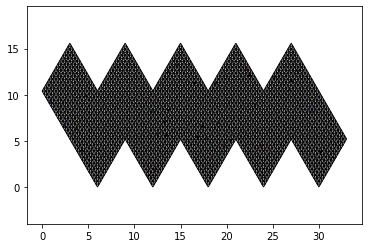

In [105]:


out_filename='BBBP_refined_augmented.hdf5'
Create_Diff_Conformer_Dataset_From_SMILES(DIVISION=4, 
                   save_dir=save_dir, 
                   data_dir=data_dir, 
                   out_filename=out_filename, 
                   do_Hdonors=True,
                   ico_key_name="icosahedron_level4",
                   num_of_molecules_override=0,
                   NUM_MAPS_PER_MOLECULE=120,
                   sanitize=True,
                   SMILES_array=SMILES_array,
                   num_out_files=1,
                   extra_augmentation='conformer',
                   verbose=False,
                   num_of_working_smiles=len(SMILES_array)-len(Failures))
 

In [20]:
SMILES_array)

2050

In [60]:
Failures[9]

649

In [98]:
smiles_string=SMILES_array[Failures[1]]
print(smiles_string)
base_m=rdkit.Chem.MolFromSmiles(smiles_string, sanitize=True)
if base_m is None:
    print('hi')
    base_m = rdkit.Chem.MolFromSmiles(smiles_string, sanitize=False)
    base_m.UpdatePropertyCache(strict=False)
    rdkit.Chem.SanitizeMol(base_m, rdkit.Chem.SanitizeFlags.SANITIZE_FINDRADICALS | rdkit.Chem.SanitizeFlags.SANITIZE_KEKULIZE | rdkit.Chem.SanitizeFlags.SANITIZE_SETAROMATICITY | rdkit.Chem.SanitizeFlags.SANITIZE_SETCONJUGATION | rdkit.Chem.SanitizeFlags.SANITIZE_SETHYBRIDIZATION | rdkit.Chem.SanitizeFlags.SANITIZE_SYMMRINGS, catchErrors=True)
else:
    base_m.UpdatePropertyCache()
rdkit.Chem.AllChem.EmbedMolecule(base_m)
# Add the hydrogens
molecule = rdkit.Chem.AddHs(base_m)
#rdkit.Chem.AllChem.EmbedMolecule(molecule, )
# use MMFF94 to minimise and make a nice structure
rdkit.Chem.AllChem.MMFFOptimizeMolecule(molecule)
base_m

c1(nc(NC(N)=[NH2])sc1)CSCCNC(=[NH]C#N)NC
hi


AtomValenceException: Explicit valence for atom # 6 N, 4, is greater than permitted

In [96]:
df['name'][Failures]

59              15
61           22767
391       ICI17148
614         05-Jun
642             12
645             16
646             17
647             18
648             19
649              2
685          9-C17
1998    spiclamine
Name: name, dtype: object

In [97]:
df['smiles'][Failures]

59             O=N([O-])C1=C(CN=C1NCCSCc2ncccc2)Cc3ccccc3
61               c1(nc(NC(N)=[NH2])sc1)CSCCNC(=[NH]C#N)NC
391                                Cc1nc(sc1)\[NH]=C(\N)N
614             s1cc(CSCCN\C(NC)=[NH]\C#N)nc1\[NH]=C(\N)N
642                   c1c(c(ncc1)CSCCN\C(=[NH]\C#N)NCC)Br
645                         n1c(csc1\[NH]=C(\N)N)c1ccccc1
646                      n1c(csc1\[NH]=C(\N)N)c1cccc(c1)N
647                n1c(csc1\[NH]=C(\N)N)c1cccc(c1)NC(C)=O
648       n1c(csc1\[NH]=C(\N)N)c1cccc(c1)N\C(NC)=[NH]\C#N
649                                s1cc(nc1\[NH]=C(\N)N)C
685                c1(cc(N\C(=[NH]\c2cccc(c2)CC)C)ccc1)CC
1998    [C@@H]3(C1=CC=C(Cl)C=C1)[C@H]2CC[C@@H](C2)C34C...
Name: smiles, dtype: object

12/2050

In [48]:
12.0/2050

0.005853658536585366

In [ ]:
#outfile.close()
hf.close()

## Test stuff
this allows you to check that the hdf5 has been made correctly

In [85]:
out_filename='BBBP_fixed.hdf5'
print(save_dir,out_filename)
#infile = "PDBBindTEST_div4.hdf5"
#h5py.File(os.path.join(save_dir,out_filename),"w")
hf = h5py.File(os.path.join(save_dir,out_filename), 'r')
n1 = hf['name']
print(n1.value)
print(len(n1))
#print(hf['Compound ID'])
hf.keys()
#hf.close()

e:\Nextcloud\science\Datasets BBBP_fixed.hdf5
['Propanolol' 'Terbutylchlorambucil' '40730' ... 'mesocarb' 'tofisoline'
 'azidamfenicol']
2038


C:\Users\ella_\.conda\envs\icosohedron_projection\lib\site-packages\ipykernel_launcher.py:7: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  import sys


<KeysViewHDF5 ['MolLogP', 'PMI_1', 'PMI_2', 'PMI_3', 'asphericity', 'eccentricity', 'icosahedron_level4', 'inertial_shape_factor', 'molID', 'name', 'num', 'num_ heteroatoms', 'num_H_acceptors', 'num_H_donors', 'num_atoms', 'num_bonds', 'num_exact_Mol_Wt', 'num_heavy_atoms', 'num_valence_electrons', 'p_np', 'radius_of_gyration', 'smiles', 'spherocity']>

In [ ]:
hf.keys()

In [91]:
egg=hf['smiles'].value[2037]
egg

C:\Users\ella_\.conda\envs\icosohedron_projection\lib\site-packages\ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


'[N+](=NCC(=O)N[C@@H]([C@H](O)C1=CC=C([N+]([O-])=O)C=C1)CO)=[N-]'

In [92]:
hf.close()

In [51]:
import collections
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [55]:
len(SMILES_array)-12

2038

In [58]:
egg=hf['icosahedron_level4'].value[0]
r_channel = collections.Counter(egg.transpose()[0].tolist())
g_channel = collections.Counter(egg.transpose()[1].tolist())
b_channel = collections.Counter(egg.transpose()[2].tolist())
for idx in range(2038):
    egg=hf['icosahedron_level4'].value[idx+1]
    eggT = egg.transpose()
    r_channel = r_channel + collections.Counter(egg.transpose()[0].tolist()) #0 as red channel
    g_channel = g_channel + collections.Counter(egg.transpose()[1].tolist()) #0 as red channel
    b_channel = b_channel + collections.Counter(egg.transpose()[2].tolist()) #0 as red channel
    if idx % 120:
        print(r_channel)
#counters = [collections.Counter(x.tolist()) for x in eggT]
#
#egg[:][0]
#counters[0]

C:\Users\ella_\.conda\envs\icosohedron_projection\lib\site-packages\ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.
C:\Users\ella_\.conda\envs\icosohedron_projection\lib\site-packages\ipykernel_launcher.py:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  


Counter({0.0: 15224, 1.0080000162124634: 67, 12.01099967956543: 52, 15.99899959564209: 8, 14.006999969482422: 5, 35.452999114990234: 3, 18.99799919128418: 1})
Counter({0.0: 20298, 1.0080000162124634: 92, 12.01099967956543: 69, 15.99899959564209: 10, 14.006999969482422: 7, 35.452999114990234: 3, 18.99799919128418: 1})
Counter({0.0: 25371, 1.0080000162124634: 110, 12.01099967956543: 88, 15.99899959564209: 15, 14.006999969482422: 10, 35.452999114990234: 4, 18.99799919128418: 1, 32.06700134277344: 1})
Counter({0.0: 30422, 1.0080000162124634: 136, 12.01099967956543: 113, 15.99899959564209: 23, 14.006999969482422: 18, 35.452999114990234: 4, 32.06700134277344: 3, 18.99799919128418: 1})
Counter({0.0: 35472, 1.0080000162124634: 168, 12.01099967956543: 140, 15.99899959564209: 31, 14.006999969482422: 21, 35.452999114990234: 4, 32.06700134277344: 3, 18.99799919128418: 1})
Counter({0.0: 40551, 1.0080000162124634: 187, 12.01099967956543: 158, 15.99899959564209: 32, 14.006999969482422: 24, 35.4529991

Counter({0.0: 228447, 1.0080000162124634: 919, 12.01099967956543: 756, 14.006999969482422: 131, 15.99899959564209: 107, 35.452999114990234: 17, 32.06700134277344: 15, 18.99799919128418: 6, 79.90399932861328: 1, 126.90399932861328: 1})
Counter({0.0: 233530, 1.0080000162124634: 936, 12.01099967956543: 772, 14.006999969482422: 133, 15.99899959564209: 107, 35.452999114990234: 18, 32.06700134277344: 16, 18.99799919128418: 6, 79.90399932861328: 1, 126.90399932861328: 1})
Counter({0.0: 238609, 1.0080000162124634: 953, 12.01099967956543: 789, 14.006999969482422: 137, 15.99899959564209: 110, 35.452999114990234: 18, 32.06700134277344: 16, 18.99799919128418: 6, 79.90399932861328: 1, 126.90399932861328: 1})
Counter({0.0: 243680, 1.0080000162124634: 971, 12.01099967956543: 807, 14.006999969482422: 143, 15.99899959564209: 115, 35.452999114990234: 18, 32.06700134277344: 18, 18.99799919128418: 6, 79.90399932861328: 1, 126.90399932861328: 1})
Counter({0.0: 248775, 1.0080000162124634: 985, 12.0109996795

Counter({0.0: 401047, 1.0080000162124634: 1601, 12.01099967956543: 1346, 14.006999969482422: 233, 15.99899959564209: 185, 32.06700134277344: 31, 35.452999114990234: 25, 18.99799919128418: 9, 79.90399932861328: 1, 126.90399932861328: 1, 22.989999771118164: 1})
Counter({0.0: 406145, 1.0080000162124634: 1611, 12.01099967956543: 1355, 14.006999969482422: 236, 15.99899959564209: 185, 32.06700134277344: 31, 35.452999114990234: 25, 18.99799919128418: 9, 79.90399932861328: 1, 126.90399932861328: 1, 22.989999771118164: 1})
Counter({0.0: 411241, 1.0080000162124634: 1621, 12.01099967956543: 1362, 14.006999969482422: 239, 15.99899959564209: 188, 32.06700134277344: 31, 35.452999114990234: 26, 18.99799919128418: 9, 79.90399932861328: 1, 126.90399932861328: 1, 22.989999771118164: 1})
Counter({0.0: 416318, 1.0080000162124634: 1645, 12.01099967956543: 1378, 14.006999969482422: 241, 15.99899959564209: 189, 32.06700134277344: 31, 35.452999114990234: 26, 18.99799919128418: 9, 79.90399932861328: 1, 126.903

Counter({0.0: 573751, 1.0080000162124634: 2241, 12.01099967956543: 1882, 14.006999969482422: 315, 15.99899959564209: 276, 32.06700134277344: 42, 35.452999114990234: 31, 18.99799919128418: 16, 126.90399932861328: 3, 79.90399932861328: 2, 22.989999771118164: 1})
Counter({0.0: 578823, 1.0080000162124634: 2268, 12.01099967956543: 1901, 14.006999969482422: 316, 15.99899959564209: 277, 32.06700134277344: 42, 35.452999114990234: 31, 18.99799919128418: 16, 126.90399932861328: 3, 79.90399932861328: 2, 22.989999771118164: 1})
Counter({0.0: 583922, 1.0080000162124634: 2278, 12.01099967956543: 1909, 14.006999969482422: 318, 15.99899959564209: 277, 32.06700134277344: 43, 35.452999114990234: 31, 18.99799919128418: 16, 126.90399932861328: 3, 79.90399932861328: 2, 22.989999771118164: 1})
Counter({0.0: 588968, 1.0080000162124634: 2310, 12.01099967956543: 1938, 14.006999969482422: 318, 15.99899959564209: 290, 32.06700134277344: 43, 35.452999114990234: 31, 18.99799919128418: 16, 126.90399932861328: 3, 79

Counter({0.0: 756611, 1.0080000162124634: 2908, 12.01099967956543: 2432, 14.006999969482422: 400, 15.99899959564209: 397, 32.06700134277344: 62, 35.452999114990234: 39, 18.99799919128418: 19, 22.989999771118164: 6, 126.90399932861328: 3, 79.90399932861328: 2, 30.974000930786133: 1})
Counter({0.0: 761701, 1.0080000162124634: 2921, 12.01099967956543: 2442, 14.006999969482422: 402, 15.99899959564209: 400, 32.06700134277344: 63, 35.452999114990234: 40, 18.99799919128418: 19, 22.989999771118164: 6, 126.90399932861328: 3, 79.90399932861328: 2, 30.974000930786133: 1})
Counter({0.0: 766765, 1.0080000162124634: 2944, 12.01099967956543: 2464, 15.99899959564209: 408, 14.006999969482422: 404, 32.06700134277344: 63, 35.452999114990234: 41, 18.99799919128418: 19, 22.989999771118164: 6, 126.90399932861328: 3, 79.90399932861328: 2, 30.974000930786133: 1})
Counter({0.0: 771852, 1.0080000162124634: 2955, 12.01099967956543: 2478, 15.99899959564209: 412, 14.006999969482422: 406, 32.06700134277344: 64, 35.

Counter({0.0: 918993, 1.0080000162124634: 3614, 12.01099967956543: 3005, 15.99899959564209: 504, 14.006999969482422: 449, 32.06700134277344: 67, 35.452999114990234: 47, 18.99799919128418: 29, 22.989999771118164: 6, 126.90399932861328: 3, 79.90399932861328: 2, 30.974000930786133: 1})
Counter({0.0: 924073, 1.0080000162124634: 3634, 12.01099967956543: 3023, 15.99899959564209: 506, 14.006999969482422: 449, 32.06700134277344: 67, 35.452999114990234: 47, 18.99799919128418: 29, 22.989999771118164: 6, 126.90399932861328: 3, 79.90399932861328: 2, 30.974000930786133: 1})
Counter({0.0: 929079, 1.0080000162124634: 3697, 12.01099967956543: 3062, 15.99899959564209: 518, 14.006999969482422: 449, 32.06700134277344: 67, 35.452999114990234: 47, 18.99799919128418: 29, 22.989999771118164: 6, 126.90399932861328: 3, 79.90399932861328: 2, 30.974000930786133: 1})
Counter({0.0: 934085, 1.0080000162124634: 3758, 12.01099967956543: 3102, 15.99899959564209: 531, 14.006999969482422: 449, 32.06700134277344: 67, 35.

Counter({0.0: 1091097, 1.0080000162124634: 4601, 12.01099967956543: 3749, 15.99899959564209: 656, 14.006999969482422: 520, 32.06700134277344: 73, 35.452999114990234: 57, 18.99799919128418: 33, 22.989999771118164: 6, 79.90399932861328: 4, 126.90399932861328: 3, 30.974000930786133: 1})
Counter({0.0: 1096170, 1.0080000162124634: 4626, 12.01099967956543: 3768, 15.99899959564209: 658, 14.006999969482422: 521, 32.06700134277344: 73, 35.452999114990234: 57, 18.99799919128418: 33, 22.989999771118164: 6, 79.90399932861328: 4, 126.90399932861328: 3, 30.974000930786133: 1})
Counter({0.0: 1101237, 1.0080000162124634: 4656, 12.01099967956543: 3789, 15.99899959564209: 660, 14.006999969482422: 521, 32.06700134277344: 73, 35.452999114990234: 57, 18.99799919128418: 33, 22.989999771118164: 6, 79.90399932861328: 4, 126.90399932861328: 3, 30.974000930786133: 1})
Counter({0.0: 1106314, 1.0080000162124634: 4676, 12.01099967956543: 3808, 15.99899959564209: 663, 14.006999969482422: 522, 32.06700134277344: 73,

Counter({0.0: 1268824, 1.0080000162124634: 5309, 12.01099967956543: 4320, 15.99899959564209: 742, 14.006999969482422: 587, 32.06700134277344: 86, 35.452999114990234: 68, 18.99799919128418: 47, 79.90399932861328: 7, 22.989999771118164: 6, 126.90399932861328: 3, 30.974000930786133: 1})
Counter({0.0: 1273890, 1.0080000162124634: 5334, 12.01099967956543: 4342, 15.99899959564209: 748, 14.006999969482422: 588, 32.06700134277344: 86, 35.452999114990234: 68, 18.99799919128418: 47, 79.90399932861328: 7, 22.989999771118164: 6, 126.90399932861328: 3, 30.974000930786133: 1})
Counter({0.0: 1278962, 1.0080000162124634: 5349, 12.01099967956543: 4364, 15.99899959564209: 759, 14.006999969482422: 588, 32.06700134277344: 86, 35.452999114990234: 68, 18.99799919128418: 47, 79.90399932861328: 7, 22.989999771118164: 6, 126.90399932861328: 3, 30.974000930786133: 1})
Counter({0.0: 1284069, 1.0080000162124634: 5355, 12.01099967956543: 4367, 15.99899959564209: 761, 14.006999969482422: 590, 32.06700134277344: 86,

Counter({0.0: 1421271, 1.0080000162124634: 5830, 12.01099967956543: 4760, 15.99899959564209: 842, 14.006999969482422: 658, 32.06700134277344: 90, 35.452999114990234: 80, 18.99799919128418: 51, 79.90399932861328: 8, 22.989999771118164: 6, 126.90399932861328: 3, 30.974000930786133: 1})
Counter({0.0: 1426366, 1.0080000162124634: 5841, 12.01099967956543: 4769, 15.99899959564209: 846, 14.006999969482422: 659, 32.06700134277344: 90, 35.452999114990234: 80, 18.99799919128418: 51, 79.90399932861328: 8, 22.989999771118164: 6, 126.90399932861328: 3, 30.974000930786133: 1})
Counter({0.0: 1431462, 1.0080000162124634: 5853, 12.01099967956543: 4775, 15.99899959564209: 852, 14.006999969482422: 659, 32.06700134277344: 90, 35.452999114990234: 80, 18.99799919128418: 51, 79.90399932861328: 8, 22.989999771118164: 6, 126.90399932861328: 3, 30.974000930786133: 1})
Counter({0.0: 1436529, 1.0080000162124634: 5874, 12.01099967956543: 4796, 15.99899959564209: 860, 14.006999969482422: 661, 32.06700134277344: 90,

Counter({0.0: 1568617, 1.0080000162124634: 6354, 12.01099967956543: 5199, 15.99899959564209: 920, 14.006999969482422: 729, 35.452999114990234: 95, 32.06700134277344: 94, 18.99799919128418: 51, 79.90399932861328: 11, 22.989999771118164: 6, 126.90399932861328: 3, 30.974000930786133: 1})
Counter({0.0: 1573681, 1.0080000162124634: 6381, 12.01099967956543: 5220, 15.99899959564209: 922, 14.006999969482422: 734, 35.452999114990234: 95, 32.06700134277344: 95, 18.99799919128418: 51, 79.90399932861328: 11, 22.989999771118164: 6, 126.90399932861328: 3, 30.974000930786133: 1})
Counter({0.0: 1578761, 1.0080000162124634: 6401, 12.01099967956543: 5238, 15.99899959564209: 922, 14.006999969482422: 736, 35.452999114990234: 95, 32.06700134277344: 95, 18.99799919128418: 51, 79.90399932861328: 11, 22.989999771118164: 6, 126.90399932861328: 3, 30.974000930786133: 1})
Counter({0.0: 1583845, 1.0080000162124634: 6414, 12.01099967956543: 5256, 15.99899959564209: 922, 14.006999969482422: 739, 35.452999114990234:

Counter({0.0: 1715869, 1.0080000162124634: 6922, 12.01099967956543: 5692, 15.99899959564209: 997, 14.006999969482422: 791, 35.452999114990234: 102, 32.06700134277344: 100, 18.99799919128418: 62, 79.90399932861328: 11, 22.989999771118164: 7, 126.90399932861328: 6, 30.974000930786133: 1})
Counter({0.0: 1720953, 1.0080000162124634: 6938, 12.01099967956543: 5709, 15.99899959564209: 998, 14.006999969482422: 792, 35.452999114990234: 103, 32.06700134277344: 100, 18.99799919128418: 62, 79.90399932861328: 11, 22.989999771118164: 7, 126.90399932861328: 6, 30.974000930786133: 1})
Counter({0.0: 1726030, 1.0080000162124634: 6960, 12.01099967956543: 5722, 15.99899959564209: 1001, 14.006999969482422: 796, 35.452999114990234: 103, 32.06700134277344: 101, 18.99799919128418: 62, 79.90399932861328: 11, 22.989999771118164: 7, 126.90399932861328: 6, 30.974000930786133: 1})
Counter({0.0: 1731122, 1.0080000162124634: 6971, 12.01099967956543: 5732, 15.99899959564209: 1004, 14.006999969482422: 799, 35.45299911

Counter({0.0: 1873232, 1.0080000162124634: 7540, 12.01099967956543: 6215, 15.99899959564209: 1117, 14.006999969482422: 866, 32.06700134277344: 111, 35.452999114990234: 105, 18.99799919128418: 64, 79.90399932861328: 12, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 1, 40.077999114990234: 1})
Counter({0.0: 1878329, 1.0080000162124634: 7552, 12.01099967956543: 6221, 15.99899959564209: 1117, 14.006999969482422: 869, 32.06700134277344: 112, 35.452999114990234: 105, 18.99799919128418: 64, 79.90399932861328: 12, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 1883285, 1.0080000162124634: 7619, 12.01099967956543: 6287, 15.99899959564209: 1138, 14.006999969482422: 877, 32.06700134277344: 112, 35.452999114990234: 107, 18.99799919128418: 64, 79.90399932861328: 12, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 1888367, 1.0080000162124634: 7632, 12.010999679

Counter({0.0: 2020325, 1.0080000162124634: 8186, 12.01099967956543: 6735, 15.99899959564209: 1232, 14.006999969482422: 941, 32.06700134277344: 122, 35.452999114990234: 117, 18.99799919128418: 71, 79.90399932861328: 12, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2025399, 1.0080000162124634: 8210, 12.01099967956543: 6754, 15.99899959564209: 1235, 14.006999969482422: 941, 32.06700134277344: 122, 35.452999114990234: 117, 18.99799919128418: 71, 79.90399932861328: 12, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2030472, 1.0080000162124634: 8238, 12.01099967956543: 6771, 15.99899959564209: 1237, 14.006999969482422: 941, 32.06700134277344: 122, 35.452999114990234: 117, 18.99799919128418: 71, 79.90399932861328: 12, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2035536, 1.0080000162124634: 8262, 12.010999679

Counter({0.0: 2157387, 1.0080000162124634: 8747, 12.01099967956543: 7187, 15.99899959564209: 1305, 14.006999969482422: 1001, 32.06700134277344: 129, 35.452999114990234: 127, 18.99799919128418: 84, 79.90399932861328: 14, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2162438, 1.0080000162124634: 8783, 12.01099967956543: 7214, 15.99899959564209: 1309, 14.006999969482422: 1003, 32.06700134277344: 129, 35.452999114990234: 127, 18.99799919128418: 84, 79.90399932861328: 14, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2167519, 1.0080000162124634: 8799, 12.01099967956543: 7233, 15.99899959564209: 1313, 14.006999969482422: 1003, 32.06700134277344: 129, 35.452999114990234: 127, 18.99799919128418: 84, 79.90399932861328: 14, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2172626, 1.0080000162124634: 8807, 12.010999

Counter({0.0: 2304906, 1.0080000162124634: 9218, 12.01099967956543: 7560, 15.99899959564209: 1358, 14.006999969482422: 1045, 35.452999114990234: 136, 32.06700134277344: 133, 18.99799919128418: 91, 79.90399932861328: 14, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2309991, 1.0080000162124634: 9230, 12.01099967956543: 7576, 15.99899959564209: 1361, 14.006999969482422: 1048, 35.452999114990234: 136, 32.06700134277344: 133, 18.99799919128418: 92, 79.90399932861328: 14, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2315098, 1.0080000162124634: 9235, 12.01099967956543: 7580, 15.99899959564209: 1362, 14.006999969482422: 1048, 35.452999114990234: 136, 32.06700134277344: 133, 18.99799919128418: 95, 79.90399932861328: 14, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2320210, 1.0080000162124634: 9236, 12.010999

Counter({0.0: 2467688, 1.0080000162124634: 9734, 12.01099967956543: 7971, 15.99899959564209: 1417, 14.006999969482422: 1088, 35.452999114990234: 143, 32.06700134277344: 136, 18.99799919128418: 109, 79.90399932861328: 15, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2472757, 1.0080000162124634: 9759, 12.01099967956543: 7992, 15.99899959564209: 1419, 14.006999969482422: 1091, 35.452999114990234: 143, 32.06700134277344: 136, 18.99799919128418: 109, 79.90399932861328: 15, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2477838, 1.0080000162124634: 9776, 12.01099967956543: 8006, 15.99899959564209: 1422, 14.006999969482422: 1095, 35.452999114990234: 143, 32.06700134277344: 136, 18.99799919128418: 110, 79.90399932861328: 15, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2482916, 1.0080000162124634: 9794, 12.010

Counter({0.0: 2604873, 1.0080000162124634: 10246, 12.01099967956543: 8375, 15.99899959564209: 1468, 14.006999969482422: 1148, 35.452999114990234: 158, 32.06700134277344: 138, 18.99799919128418: 119, 79.90399932861328: 16, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2609937, 1.0080000162124634: 10275, 12.01099967956543: 8395, 15.99899959564209: 1471, 14.006999969482422: 1151, 35.452999114990234: 158, 32.06700134277344: 139, 18.99799919128418: 119, 79.90399932861328: 16, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2615005, 1.0080000162124634: 10300, 12.01099967956543: 8414, 15.99899959564209: 1474, 14.006999969482422: 1154, 35.452999114990234: 158, 32.06700134277344: 139, 18.99799919128418: 121, 79.90399932861328: 16, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2620071, 1.0080000162124634: 10327, 12

Counter({0.0: 2762380, 1.0080000162124634: 10822, 12.01099967956543: 8842, 15.99899959564209: 1535, 14.006999969482422: 1220, 35.452999114990234: 172, 32.06700134277344: 148, 18.99799919128418: 125, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2767465, 1.0080000162124634: 10834, 12.01099967956543: 8856, 15.99899959564209: 1540, 14.006999969482422: 1223, 35.452999114990234: 172, 32.06700134277344: 149, 18.99799919128418: 125, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2772540, 1.0080000162124634: 10858, 12.01099967956543: 8875, 15.99899959564209: 1541, 14.006999969482422: 1224, 35.452999114990234: 172, 32.06700134277344: 149, 18.99799919128418: 125, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2777616, 1.0080000162124634: 10877, 12

Counter({0.0: 2894566, 1.0080000162124634: 11265, 12.01099967956543: 9223, 15.99899959564209: 1575, 14.006999969482422: 1264, 35.452999114990234: 184, 32.06700134277344: 155, 18.99799919128418: 132, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2899646, 1.0080000162124634: 11282, 12.01099967956543: 9239, 15.99899959564209: 1578, 14.006999969482422: 1267, 35.452999114990234: 184, 32.06700134277344: 155, 18.99799919128418: 133, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2904724, 1.0080000162124634: 11301, 12.01099967956543: 9255, 15.99899959564209: 1581, 14.006999969482422: 1270, 35.452999114990234: 184, 32.06700134277344: 155, 18.99799919128418: 134, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 2909808, 1.0080000162124634: 11314, 12

Counter({0.0: 3036714, 1.0080000162124634: 11844, 12.01099967956543: 9715, 15.99899959564209: 1638, 14.006999969482422: 1324, 35.452999114990234: 193, 32.06700134277344: 161, 18.99799919128418: 135, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 3041785, 1.0080000162124634: 11866, 12.01099967956543: 9734, 15.99899959564209: 1640, 14.006999969482422: 1328, 35.452999114990234: 195, 32.06700134277344: 161, 18.99799919128418: 135, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 3046858, 1.0080000162124634: 11887, 12.01099967956543: 9752, 15.99899959564209: 1641, 14.006999969482422: 1333, 35.452999114990234: 197, 32.06700134277344: 161, 18.99799919128418: 135, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 3051924, 1.0080000162124634: 11914, 12

Counter({0.0: 3188982, 1.0080000162124634: 12459, 12.01099967956543: 10274, 15.99899959564209: 1694, 14.006999969482422: 1405, 35.452999114990234: 206, 32.06700134277344: 163, 18.99799919128418: 141, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 3194081, 1.0080000162124634: 12470, 12.01099967956543: 10281, 15.99899959564209: 1696, 14.006999969482422: 1406, 35.452999114990234: 206, 32.06700134277344: 163, 18.99799919128418: 141, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 3199154, 1.0080000162124634: 12494, 12.01099967956543: 10301, 15.99899959564209: 1696, 14.006999969482422: 1408, 35.452999114990234: 206, 32.06700134277344: 164, 18.99799919128418: 141, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 3204219, 1.0080000162124634: 12519,

Counter({0.0: 3351439, 1.0080000162124634: 13148, 12.01099967956543: 10816, 15.99899959564209: 1750, 14.006999969482422: 1472, 35.452999114990234: 214, 32.06700134277344: 173, 18.99799919128418: 152, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 3356507, 1.0080000162124634: 13173, 12.01099967956543: 10838, 15.99899959564209: 1752, 14.006999969482422: 1475, 35.452999114990234: 214, 32.06700134277344: 173, 18.99799919128418: 152, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 3361569, 1.0080000162124634: 13200, 12.01099967956543: 10863, 15.99899959564209: 1754, 14.006999969482422: 1478, 35.452999114990234: 214, 32.06700134277344: 174, 18.99799919128418: 152, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 2, 40.077999114990234: 1})
Counter({0.0: 3366633, 1.0080000162124634: 13228,

Counter({0.0: 3483587, 1.0080000162124634: 13612, 12.01099967956543: 11196, 15.99899959564209: 1797, 14.006999969482422: 1536, 35.452999114990234: 222, 32.06700134277344: 179, 18.99799919128418: 154, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 3, 40.077999114990234: 1})
Counter({0.0: 3488663, 1.0080000162124634: 13634, 12.01099967956543: 11214, 15.99899959564209: 1798, 14.006999969482422: 1538, 35.452999114990234: 222, 32.06700134277344: 180, 18.99799919128418: 154, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 3, 40.077999114990234: 1})
Counter({0.0: 3493737, 1.0080000162124634: 13657, 12.01099967956543: 11233, 15.99899959564209: 1799, 14.006999969482422: 1540, 35.452999114990234: 222, 32.06700134277344: 181, 18.99799919128418: 154, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 3, 40.077999114990234: 1})
Counter({0.0: 3498840, 1.0080000162124634: 13667,

Counter({0.0: 3641000, 1.0080000162124634: 14228, 12.01099967956543: 11708, 15.99899959564209: 1897, 14.006999969482422: 1598, 35.452999114990234: 227, 32.06700134277344: 186, 18.99799919128418: 159, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 3, 40.077999114990234: 1})
Counter({0.0: 3646076, 1.0080000162124634: 14248, 12.01099967956543: 11722, 15.99899959564209: 1903, 14.006999969482422: 1601, 35.452999114990234: 227, 32.06700134277344: 187, 18.99799919128418: 159, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 3, 40.077999114990234: 1})
Counter({0.0: 3651170, 1.0080000162124634: 14261, 12.01099967956543: 11731, 15.99899959564209: 1906, 14.006999969482422: 1602, 35.452999114990234: 227, 32.06700134277344: 187, 18.99799919128418: 159, 79.90399932861328: 17, 22.989999771118164: 10, 126.90399932861328: 6, 30.974000930786133: 3, 40.077999114990234: 1})
Counter({0.0: 3656242, 1.0080000162124634: 14279,

Counter({0.0: 3787834, 1.0080000162124634: 14998, 12.01099967956543: 12274, 15.99899959564209: 2094, 14.006999969482422: 1691, 35.452999114990234: 229, 32.06700134277344: 203, 18.99799919128418: 159, 79.90399932861328: 17, 22.989999771118164: 11, 126.90399932861328: 6, 30.974000930786133: 3, 40.077999114990234: 1})
Counter({0.0: 3792912, 1.0080000162124634: 15013, 12.01099967956543: 12292, 15.99899959564209: 2100, 14.006999969482422: 1693, 35.452999114990234: 229, 32.06700134277344: 204, 18.99799919128418: 159, 79.90399932861328: 17, 22.989999771118164: 11, 126.90399932861328: 6, 30.974000930786133: 3, 40.077999114990234: 1})
Counter({0.0: 3797982, 1.0080000162124634: 15032, 12.01099967956543: 12311, 15.99899959564209: 2104, 14.006999969482422: 1698, 35.452999114990234: 229, 32.06700134277344: 207, 18.99799919128418: 159, 79.90399932861328: 17, 22.989999771118164: 11, 126.90399932861328: 6, 30.974000930786133: 3, 40.077999114990234: 1})
Counter({0.0: 3803053, 1.0080000162124634: 15050,

Counter({0.0: 3945043, 1.0080000162124634: 15543, 12.01099967956543: 12818, 15.99899959564209: 2268, 14.006999969482422: 1857, 32.06700134277344: 276, 35.452999114990234: 233, 18.99799919128418: 162, 79.90399932861328: 17, 22.989999771118164: 13, 126.90399932861328: 6, 30.974000930786133: 3, 40.077999114990234: 1})
Counter({0.0: 3950116, 1.0080000162124634: 15560, 12.01099967956543: 12833, 15.99899959564209: 2273, 14.006999969482422: 1865, 32.06700134277344: 278, 35.452999114990234: 233, 18.99799919128418: 162, 79.90399932861328: 17, 22.989999771118164: 13, 126.90399932861328: 6, 30.974000930786133: 3, 40.077999114990234: 1})
Counter({0.0: 3955196, 1.0080000162124634: 15572, 12.01099967956543: 12846, 15.99899959564209: 2277, 14.006999969482422: 1873, 32.06700134277344: 281, 35.452999114990234: 233, 18.99799919128418: 162, 79.90399932861328: 17, 22.989999771118164: 13, 126.90399932861328: 6, 30.974000930786133: 3, 40.077999114990234: 1})
Counter({0.0: 3960269, 1.0080000162124634: 15590,

Counter({0.0: 4096721, 1.0080000162124634: 16398, 12.01099967956543: 13471, 15.99899959564209: 2515, 14.006999969482422: 1982, 32.06700134277344: 309, 35.452999114990234: 240, 18.99799919128418: 162, 79.90399932861328: 17, 22.989999771118164: 14, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4101788, 1.0080000162124634: 16426, 12.01099967956543: 13490, 15.99899959564209: 2520, 14.006999969482422: 1983, 32.06700134277344: 309, 35.452999114990234: 240, 18.99799919128418: 162, 79.90399932861328: 17, 22.989999771118164: 14, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4106786, 1.0080000162124634: 16492, 12.01099967956543: 13531, 15.99899959564209: 2534, 14.006999969482422: 1984, 32.06700134277344: 309, 35.452999114990234: 240, 18.99799919128418: 162, 79.90399932861328: 17, 22.989999771118164: 14, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4111832, 1.0080000162124634: 16531,

Counter({0.0: 4242830, 1.0080000162124634: 17578, 12.01099967956543: 14323, 15.99899959564209: 2748, 14.006999969482422: 2068, 32.06700134277344: 319, 35.452999114990234: 244, 18.99799919128418: 167, 79.90399932861328: 17, 22.989999771118164: 15, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4247926, 1.0080000162124634: 17591, 12.01099967956543: 14332, 15.99899959564209: 2749, 14.006999969482422: 2069, 32.06700134277344: 319, 35.452999114990234: 244, 18.99799919128418: 167, 79.90399932861328: 17, 22.989999771118164: 15, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4253018, 1.0080000162124634: 17606, 12.01099967956543: 14342, 15.99899959564209: 2751, 14.006999969482422: 2070, 32.06700134277344: 319, 35.452999114990234: 244, 18.99799919128418: 167, 79.90399932861328: 17, 22.989999771118164: 15, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4258117, 1.0080000162124634: 17614,

Counter({0.0: 4399707, 1.0080000162124634: 18458, 12.01099967956543: 14984, 15.99899959564209: 2950, 14.006999969482422: 2149, 32.06700134277344: 332, 35.452999114990234: 250, 18.99799919128418: 167, 79.90399932861328: 17, 22.989999771118164: 15, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4404779, 1.0080000162124634: 18484, 12.01099967956543: 14996, 15.99899959564209: 2956, 14.006999969482422: 2153, 32.06700134277344: 332, 35.452999114990234: 250, 18.99799919128418: 167, 79.90399932861328: 17, 22.989999771118164: 15, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4409825, 1.0080000162124634: 18525, 12.01099967956543: 15017, 15.99899959564209: 2963, 14.006999969482422: 2158, 32.06700134277344: 332, 35.452999114990234: 250, 18.99799919128418: 167, 79.90399932861328: 17, 22.989999771118164: 15, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4414881, 1.0080000162124634: 18554,

Counter({0.0: 4546318, 1.0080000162124634: 19304, 12.01099967956543: 15676, 15.99899959564209: 3165, 14.006999969482422: 2246, 32.06700134277344: 347, 35.452999114990234: 252, 18.99799919128418: 167, 79.90399932861328: 17, 22.989999771118164: 17, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4551319, 1.0080000162124634: 19364, 12.01099967956543: 15721, 15.99899959564209: 3175, 14.006999969482422: 2250, 32.06700134277344: 347, 35.452999114990234: 252, 18.99799919128418: 167, 79.90399932861328: 17, 22.989999771118164: 17, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4556322, 1.0080000162124634: 19422, 12.01099967956543: 15764, 15.99899959564209: 3187, 14.006999969482422: 2254, 32.06700134277344: 347, 35.452999114990234: 252, 18.99799919128418: 167, 79.90399932861328: 17, 22.989999771118164: 17, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4561332, 1.0080000162124634: 19476,

Counter({0.0: 4692371, 1.0080000162124634: 20462, 12.01099967956543: 16562, 15.99899959564209: 3437, 14.006999969482422: 2332, 32.06700134277344: 367, 35.452999114990234: 254, 18.99799919128418: 167, 22.989999771118164: 20, 79.90399932861328: 17, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4697448, 1.0080000162124634: 20477, 12.01099967956543: 16574, 15.99899959564209: 3446, 14.006999969482422: 2337, 32.06700134277344: 369, 35.452999114990234: 254, 18.99799919128418: 167, 22.989999771118164: 20, 79.90399932861328: 17, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4702506, 1.0080000162124634: 20503, 12.01099967956543: 16601, 15.99899959564209: 3452, 14.006999969482422: 2339, 32.06700134277344: 370, 35.452999114990234: 254, 18.99799919128418: 167, 22.989999771118164: 20, 79.90399932861328: 17, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4707558, 1.0080000162124634: 20539,

Counter({0.0: 4839333, 1.0080000162124634: 21190, 12.01099967956543: 17124, 15.99899959564209: 3575, 14.006999969482422: 2399, 32.06700134277344: 375, 35.452999114990234: 260, 18.99799919128418: 173, 79.90399932861328: 20, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4844402, 1.0080000162124634: 21216, 12.01099967956543: 17144, 15.99899959564209: 3578, 14.006999969482422: 2400, 32.06700134277344: 375, 35.452999114990234: 261, 18.99799919128418: 173, 79.90399932861328: 20, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4849464, 1.0080000162124634: 21247, 12.01099967956543: 17165, 15.99899959564209: 3579, 14.006999969482422: 2405, 32.06700134277344: 375, 35.452999114990234: 261, 18.99799919128418: 173, 79.90399932861328: 20, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4854549, 1.0080000162124634: 21265,

Counter({0.0: 4986374, 1.0080000162124634: 21916, 12.01099967956543: 17691, 15.99899959564209: 3665, 14.006999969482422: 2437, 32.06700134277344: 377, 35.452999114990234: 267, 18.99799919128418: 182, 79.90399932861328: 20, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4991449, 1.0080000162124634: 21939, 12.01099967956543: 17711, 15.99899959564209: 3666, 14.006999969482422: 2438, 32.06700134277344: 377, 35.452999114990234: 267, 18.99799919128418: 182, 79.90399932861328: 20, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 4996523, 1.0080000162124634: 21966, 12.01099967956543: 17728, 15.99899959564209: 3667, 14.006999969482422: 2439, 32.06700134277344: 377, 35.452999114990234: 267, 18.99799919128418: 182, 79.90399932861328: 20, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 5001585, 1.0080000162124634: 21995,

Counter({0.0: 5133666, 1.0080000162124634: 22504, 12.01099967956543: 18163, 15.99899959564209: 3724, 14.006999969482422: 2496, 32.06700134277344: 379, 35.452999114990234: 271, 18.99799919128418: 186, 79.90399932861328: 20, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 5138745, 1.0080000162124634: 22523, 12.01099967956543: 18179, 15.99899959564209: 3724, 14.006999969482422: 2502, 32.06700134277344: 379, 35.452999114990234: 271, 18.99799919128418: 186, 79.90399932861328: 20, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 5143840, 1.0080000162124634: 22535, 12.01099967956543: 18189, 15.99899959564209: 3725, 14.006999969482422: 2503, 32.06700134277344: 379, 35.452999114990234: 272, 18.99799919128418: 186, 79.90399932861328: 20, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 4, 40.077999114990234: 1})
Counter({0.0: 5148903, 1.0080000162124634: 22564,

Counter({0.0: 5291116, 1.0080000162124634: 23087, 12.01099967956543: 18673, 15.99899959564209: 3807, 14.006999969482422: 2557, 32.06700134277344: 388, 35.452999114990234: 277, 18.99799919128418: 194, 79.90399932861328: 29, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 5296206, 1.0080000162124634: 23102, 12.01099967956543: 18685, 15.99899959564209: 3809, 14.006999969482422: 2558, 32.06700134277344: 388, 35.452999114990234: 277, 18.99799919128418: 194, 79.90399932861328: 29, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 5301267, 1.0080000162124634: 23133, 12.01099967956543: 18710, 15.99899959564209: 3810, 14.006999969482422: 2559, 32.06700134277344: 388, 35.452999114990234: 278, 18.99799919128418: 194, 79.90399932861328: 29, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 5306327, 1.0080000162124634: 23164,

Counter({0.0: 5433269, 1.0080000162124634: 23676, 12.01099967956543: 19118, 15.99899959564209: 3896, 14.006999969482422: 2609, 32.06700134277344: 394, 35.452999114990234: 301, 18.99799919128418: 196, 79.90399932861328: 29, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 5438360, 1.0080000162124634: 23688, 12.01099967956543: 19129, 15.99899959564209: 3899, 14.006999969482422: 2610, 32.06700134277344: 395, 35.452999114990234: 302, 18.99799919128418: 196, 79.90399932861328: 29, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 5443475, 1.0080000162124634: 23689, 12.01099967956543: 19130, 15.99899959564209: 3899, 14.006999969482422: 2610, 32.06700134277344: 395, 35.452999114990234: 305, 18.99799919128418: 196, 79.90399932861328: 29, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 5448575, 1.0080000162124634: 23695,

Counter({0.0: 5580366, 1.0080000162124634: 24339, 12.01099967956543: 19676, 15.99899959564209: 3976, 14.006999969482422: 2648, 32.06700134277344: 398, 35.452999114990234: 326, 18.99799919128418: 209, 79.90399932861328: 30, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 5585468, 1.0080000162124634: 24343, 12.01099967956543: 19681, 15.99899959564209: 3979, 14.006999969482422: 2648, 32.06700134277344: 398, 35.452999114990234: 332, 18.99799919128418: 209, 79.90399932861328: 30, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 5590557, 1.0080000162124634: 24357, 12.01099967956543: 19694, 15.99899959564209: 3980, 14.006999969482422: 2649, 32.06700134277344: 398, 35.452999114990234: 334, 18.99799919128418: 209, 79.90399932861328: 30, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 5595627, 1.0080000162124634: 24380,

Counter({0.0: 5727512, 1.0080000162124634: 24995, 12.01099967956543: 20219, 15.99899959564209: 4048, 14.006999969482422: 2685, 32.06700134277344: 404, 35.452999114990234: 340, 18.99799919128418: 215, 79.90399932861328: 30, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 5732596, 1.0080000162124634: 25011, 12.01099967956543: 20235, 15.99899959564209: 4049, 14.006999969482422: 2687, 32.06700134277344: 405, 35.452999114990234: 340, 18.99799919128418: 215, 79.90399932861328: 30, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 5737682, 1.0080000162124634: 25025, 12.01099967956543: 20250, 15.99899959564209: 4050, 14.006999969482422: 2690, 32.06700134277344: 405, 35.452999114990234: 341, 18.99799919128418: 215, 79.90399932861328: 30, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 5742748, 1.0080000162124634: 25055,

Counter({0.0: 5864488, 1.0080000162124634: 25618, 12.01099967956543: 20714, 15.99899959564209: 4130, 14.006999969482422: 2729, 32.06700134277344: 407, 35.452999114990234: 348, 18.99799919128418: 224, 79.90399932861328: 30, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 5869579, 1.0080000162124634: 25635, 12.01099967956543: 20725, 15.99899959564209: 4130, 14.006999969482422: 2730, 32.06700134277344: 407, 35.452999114990234: 348, 18.99799919128418: 224, 79.90399932861328: 30, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 5874681, 1.0080000162124634: 25643, 12.01099967956543: 20731, 15.99899959564209: 4132, 14.006999969482422: 2732, 32.06700134277344: 407, 35.452999114990234: 348, 18.99799919128418: 224, 79.90399932861328: 30, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 5879753, 1.0080000162124634: 25671,

Counter({0.0: 6011699, 1.0080000162124634: 26247, 12.01099967956543: 21223, 15.99899959564209: 4196, 14.006999969482422: 2777, 32.06700134277344: 410, 35.452999114990234: 356, 18.99799919128418: 230, 79.90399932861328: 30, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 6016762, 1.0080000162124634: 26279, 12.01099967956543: 21243, 15.99899959564209: 4198, 14.006999969482422: 2780, 32.06700134277344: 410, 35.452999114990234: 356, 18.99799919128418: 230, 79.90399932861328: 30, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 6021839, 1.0080000162124634: 26300, 12.01099967956543: 21263, 15.99899959564209: 4198, 14.006999969482422: 2782, 32.06700134277344: 410, 35.452999114990234: 356, 18.99799919128418: 230, 79.90399932861328: 30, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 6026914, 1.0080000162124634: 26323,

Counter({0.0: 6148826, 1.0080000162124634: 26809, 12.01099967956543: 21646, 15.99899959564209: 4256, 14.006999969482422: 2835, 32.06700134277344: 412, 35.452999114990234: 363, 18.99799919128418: 231, 79.90399932861328: 30, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 6153909, 1.0080000162124634: 26830, 12.01099967956543: 21661, 15.99899959564209: 4256, 14.006999969482422: 2836, 32.06700134277344: 412, 35.452999114990234: 363, 18.99799919128418: 231, 79.90399932861328: 30, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 6158991, 1.0080000162124634: 26847, 12.01099967956543: 21678, 15.99899959564209: 4257, 14.006999969482422: 2837, 32.06700134277344: 412, 35.452999114990234: 365, 18.99799919128418: 231, 79.90399932861328: 30, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 6164074, 1.0080000162124634: 26864,

Counter({0.0: 6296020, 1.0080000162124634: 27422, 12.01099967956543: 22158, 15.99899959564209: 4338, 14.006999969482422: 2871, 32.06700134277344: 417, 35.452999114990234: 374, 18.99799919128418: 258, 79.90399932861328: 30, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 6301064, 1.0080000162124634: 27460, 12.01099967956543: 22187, 15.99899959564209: 4340, 14.006999969482422: 2874, 32.06700134277344: 418, 35.452999114990234: 374, 18.99799919128418: 261, 79.90399932861328: 30, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 6306127, 1.0080000162124634: 27486, 12.01099967956543: 22210, 15.99899959564209: 4342, 14.006999969482422: 2876, 32.06700134277344: 419, 35.452999114990234: 374, 18.99799919128418: 264, 79.90399932861328: 30, 22.989999771118164: 20, 126.90399932861328: 6, 30.974000930786133: 5, 40.077999114990234: 1})
Counter({0.0: 6311207, 1.0080000162124634: 27505,

Counter({0.0: 6443078, 1.0080000162124634: 28077, 12.01099967956543: 22719, 15.99899959564209: 4420, 14.006999969482422: 2934, 32.06700134277344: 428, 35.452999114990234: 381, 18.99799919128418: 297, 79.90399932861328: 30, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 6448156, 1.0080000162124634: 28096, 12.01099967956543: 22738, 15.99899959564209: 4420, 14.006999969482422: 2937, 32.06700134277344: 428, 35.452999114990234: 381, 18.99799919128418: 298, 79.90399932861328: 30, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 6453237, 1.0080000162124634: 28112, 12.01099967956543: 22756, 15.99899959564209: 4422, 14.006999969482422: 2939, 32.06700134277344: 428, 35.452999114990234: 382, 18.99799919128418: 298, 79.90399932861328: 30, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 6458294, 1.0080000162124634: 28144,

Counter({0.0: 6574841, 1.0080000162124634: 28751, 12.01099967956543: 23257, 15.99899959564209: 4506, 14.006999969482422: 2971, 32.06700134277344: 429, 35.452999114990234: 389, 18.99799919128418: 307, 79.90399932861328: 33, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 6579916, 1.0080000162124634: 28774, 12.01099967956543: 23276, 15.99899959564209: 4507, 14.006999969482422: 2973, 32.06700134277344: 429, 35.452999114990234: 389, 18.99799919128418: 307, 79.90399932861328: 33, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 6585000, 1.0080000162124634: 28790, 12.01099967956543: 23292, 15.99899959564209: 4507, 14.006999969482422: 2974, 32.06700134277344: 429, 35.452999114990234: 392, 18.99799919128418: 307, 79.90399932861328: 33, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 6590086, 1.0080000162124634: 28807,

Counter({0.0: 6716933, 1.0080000162124634: 29350, 12.01099967956543: 23786, 15.99899959564209: 4563, 14.006999969482422: 3031, 32.06700134277344: 431, 35.452999114990234: 406, 18.99799919128418: 311, 79.90399932861328: 33, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 6722020, 1.0080000162124634: 29362, 12.01099967956543: 23801, 15.99899959564209: 4565, 14.006999969482422: 3033, 32.06700134277344: 431, 35.452999114990234: 408, 18.99799919128418: 311, 79.90399932861328: 33, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 6727085, 1.0080000162124634: 29388, 12.01099967956543: 23822, 15.99899959564209: 4565, 14.006999969482422: 3038, 32.06700134277344: 431, 35.452999114990234: 408, 18.99799919128418: 314, 79.90399932861328: 33, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 6732168, 1.0080000162124634: 29405,

Counter({0.0: 6869339, 1.0080000162124634: 29931, 12.01099967956543: 24254, 15.99899959564209: 4627, 14.006999969482422: 3084, 32.06700134277344: 437, 35.452999114990234: 423, 18.99799919128418: 316, 79.90399932861328: 33, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 6874414, 1.0080000162124634: 29954, 12.01099967956543: 24272, 15.99899959564209: 4630, 14.006999969482422: 3085, 32.06700134277344: 437, 35.452999114990234: 423, 18.99799919128418: 316, 79.90399932861328: 33, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 6879466, 1.0080000162124634: 29989, 12.01099967956543: 24298, 15.99899959564209: 4637, 14.006999969482422: 3085, 32.06700134277344: 437, 35.452999114990234: 423, 18.99799919128418: 316, 79.90399932861328: 33, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 6884542, 1.0080000162124634: 30010,

Counter({0.0: 7021470, 1.0080000162124634: 30658, 12.01099967956543: 24831, 15.99899959564209: 4700, 14.006999969482422: 3147, 32.06700134277344: 443, 35.452999114990234: 434, 18.99799919128418: 328, 79.90399932861328: 33, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7026530, 1.0080000162124634: 30692, 12.01099967956543: 24854, 15.99899959564209: 4703, 14.006999969482422: 3147, 32.06700134277344: 443, 35.452999114990234: 434, 18.99799919128418: 328, 79.90399932861328: 33, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7031620, 1.0080000162124634: 30704, 12.01099967956543: 24869, 15.99899959564209: 4704, 14.006999969482422: 3149, 32.06700134277344: 443, 35.452999114990234: 434, 18.99799919128418: 328, 79.90399932861328: 33, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7036670, 1.0080000162124634: 30739,

Counter({0.0: 7173817, 1.0080000162124634: 31261, 12.01099967956543: 25345, 15.99899959564209: 4764, 14.006999969482422: 3208, 32.06700134277344: 443, 35.452999114990234: 436, 18.99799919128418: 336, 79.90399932861328: 34, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7178903, 1.0080000162124634: 31276, 12.01099967956543: 25360, 15.99899959564209: 4765, 14.006999969482422: 3210, 32.06700134277344: 443, 35.452999114990234: 437, 18.99799919128418: 336, 79.90399932861328: 34, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7183971, 1.0080000162124634: 31298, 12.01099967956543: 25382, 15.99899959564209: 4772, 14.006999969482422: 3211, 32.06700134277344: 443, 35.452999114990234: 437, 18.99799919128418: 336, 79.90399932861328: 34, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7189048, 1.0080000162124634: 31319,

Counter({0.0: 7310893, 1.0080000162124634: 31798, 12.01099967956543: 25838, 15.99899959564209: 4828, 14.006999969482422: 3259, 32.06700134277344: 444, 35.452999114990234: 442, 18.99799919128418: 348, 79.90399932861328: 34, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7321049, 1.0080000162124634: 31841, 12.01099967956543: 25868, 15.99899959564209: 4835, 14.006999969482422: 3263, 32.06700134277344: 444, 35.452999114990234: 442, 18.99799919128418: 348, 79.90399932861328: 34, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7326144, 1.0080000162124634: 31852, 12.01099967956543: 25875, 15.99899959564209: 4839, 14.006999969482422: 3263, 35.452999114990234: 445, 32.06700134277344: 444, 18.99799919128418: 348, 79.90399932861328: 34, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7331227, 1.0080000162124634: 31868,

Counter({0.0: 7463247, 1.0080000162124634: 32400, 12.01099967956543: 26336, 15.99899959564209: 4889, 14.006999969482422: 3322, 35.452999114990234: 458, 32.06700134277344: 450, 18.99799919128418: 348, 79.90399932861328: 34, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7468331, 1.0080000162124634: 32419, 12.01099967956543: 26350, 15.99899959564209: 4889, 14.006999969482422: 3324, 35.452999114990234: 459, 32.06700134277344: 450, 18.99799919128418: 348, 79.90399932861328: 34, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7473421, 1.0080000162124634: 32436, 12.01099967956543: 26359, 15.99899959564209: 4892, 14.006999969482422: 3325, 35.452999114990234: 459, 32.06700134277344: 450, 18.99799919128418: 348, 79.90399932861328: 34, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7478497, 1.0080000162124634: 32454,

Counter({0.0: 7600266, 1.0080000162124634: 33037, 12.01099967956543: 26802, 15.99899959564209: 4963, 14.006999969482422: 3357, 35.452999114990234: 463, 32.06700134277344: 451, 18.99799919128418: 351, 79.90399932861328: 34, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7605355, 1.0080000162124634: 33051, 12.01099967956543: 26812, 15.99899959564209: 4966, 14.006999969482422: 3361, 35.452999114990234: 463, 32.06700134277344: 451, 18.99799919128418: 351, 79.90399932861328: 34, 22.989999771118164: 20, 30.974000930786133: 9, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7610440, 1.0080000162124634: 33067, 12.01099967956543: 26824, 15.99899959564209: 4970, 14.006999969482422: 3363, 35.452999114990234: 463, 32.06700134277344: 451, 18.99799919128418: 351, 79.90399932861328: 34, 22.989999771118164: 20, 30.974000930786133: 10, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7615536, 1.0080000162124634: 33076

Counter({0.0: 7752548, 1.0080000162124634: 33682, 12.01099967956543: 27321, 15.99899959564209: 5030, 14.006999969482422: 3428, 35.452999114990234: 467, 32.06700134277344: 455, 18.99799919128418: 357, 79.90399932861328: 35, 22.989999771118164: 20, 30.974000930786133: 10, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7757639, 1.0080000162124634: 33697, 12.01099967956543: 27331, 15.99899959564209: 5031, 14.006999969482422: 3431, 35.452999114990234: 467, 32.06700134277344: 455, 18.99799919128418: 357, 79.90399932861328: 35, 22.989999771118164: 20, 30.974000930786133: 10, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7762723, 1.0080000162124634: 33713, 12.01099967956543: 27344, 15.99899959564209: 5038, 14.006999969482422: 3431, 35.452999114990234: 467, 32.06700134277344: 455, 18.99799919128418: 357, 79.90399932861328: 35, 22.989999771118164: 20, 30.974000930786133: 10, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7767826, 1.0080000162124634: 337

Counter({0.0: 7899776, 1.0080000162124634: 34289, 12.01099967956543: 27819, 15.99899959564209: 5101, 14.006999969482422: 3486, 35.452999114990234: 473, 32.06700134277344: 463, 18.99799919128418: 361, 79.90399932861328: 35, 22.989999771118164: 20, 30.974000930786133: 10, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7904854, 1.0080000162124634: 34309, 12.01099967956543: 27834, 15.99899959564209: 5105, 14.006999969482422: 3488, 35.452999114990234: 473, 32.06700134277344: 464, 18.99799919128418: 361, 79.90399932861328: 35, 22.989999771118164: 20, 30.974000930786133: 10, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7909928, 1.0080000162124634: 34331, 12.01099967956543: 27851, 15.99899959564209: 5107, 14.006999969482422: 3493, 35.452999114990234: 473, 32.06700134277344: 464, 18.99799919128418: 361, 79.90399932861328: 35, 22.989999771118164: 20, 30.974000930786133: 10, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 7914993, 1.0080000162124634: 343

Counter({0.0: 8041904, 1.0080000162124634: 34869, 12.01099967956543: 28309, 15.99899959564209: 5157, 14.006999969482422: 3568, 32.06700134277344: 477, 35.452999114990234: 476, 18.99799919128418: 368, 79.90399932861328: 35, 22.989999771118164: 20, 30.974000930786133: 10, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8046976, 1.0080000162124634: 34892, 12.01099967956543: 28329, 15.99899959564209: 5161, 14.006999969482422: 3569, 32.06700134277344: 477, 35.452999114990234: 476, 18.99799919128418: 368, 79.90399932861328: 35, 22.989999771118164: 20, 30.974000930786133: 10, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8052062, 1.0080000162124634: 34908, 12.01099967956543: 28342, 15.99899959564209: 5163, 14.006999969482422: 3571, 32.06700134277344: 478, 35.452999114990234: 476, 18.99799919128418: 368, 79.90399932861328: 35, 22.989999771118164: 20, 30.974000930786133: 10, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8057147, 1.0080000162124634: 349

Counter({0.0: 8183951, 1.0080000162124634: 35510, 12.01099967956543: 28826, 15.99899959564209: 5222, 14.006999969482422: 3620, 32.06700134277344: 502, 35.452999114990234: 485, 18.99799919128418: 372, 79.90399932861328: 35, 22.989999771118164: 20, 30.974000930786133: 10, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8189026, 1.0080000162124634: 35534, 12.01099967956543: 28843, 15.99899959564209: 5222, 14.006999969482422: 3624, 32.06700134277344: 502, 35.452999114990234: 485, 18.99799919128418: 372, 79.90399932861328: 35, 22.989999771118164: 20, 30.974000930786133: 10, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8194105, 1.0080000162124634: 35557, 12.01099967956543: 28859, 15.99899959564209: 5223, 14.006999969482422: 3625, 32.06700134277344: 502, 35.452999114990234: 485, 18.99799919128418: 372, 79.90399932861328: 35, 22.989999771118164: 20, 30.974000930786133: 10, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8199175, 1.0080000162124634: 355

Counter({0.0: 8315895, 1.0080000162124634: 36078, 12.01099967956543: 29272, 15.99899959564209: 5301, 14.006999969482422: 3674, 32.06700134277344: 504, 35.452999114990234: 502, 18.99799919128418: 378, 79.90399932861328: 38, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8320969, 1.0080000162124634: 36099, 12.01099967956543: 29286, 15.99899959564209: 5306, 14.006999969482422: 3680, 32.06700134277344: 504, 35.452999114990234: 502, 18.99799919128418: 378, 79.90399932861328: 38, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8326045, 1.0080000162124634: 36125, 12.01099967956543: 29300, 15.99899959564209: 5310, 14.006999969482422: 3680, 32.06700134277344: 504, 35.452999114990234: 502, 18.99799919128418: 378, 79.90399932861328: 38, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8331105, 1.0080000162124634: 361

Counter({0.0: 8463123, 1.0080000162124634: 36706, 12.01099967956543: 29757, 15.99899959564209: 5358, 14.006999969482422: 3735, 32.06700134277344: 511, 35.452999114990234: 510, 18.99799919128418: 384, 79.90399932861328: 38, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8468188, 1.0080000162124634: 36736, 12.01099967956543: 29778, 15.99899959564209: 5362, 14.006999969482422: 3735, 32.06700134277344: 511, 35.452999114990234: 510, 18.99799919128418: 384, 79.90399932861328: 38, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8473267, 1.0080000162124634: 36756, 12.01099967956543: 29796, 15.99899959564209: 5362, 14.006999969482422: 3737, 32.06700134277344: 512, 35.452999114990234: 510, 18.99799919128418: 384, 79.90399932861328: 38, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8478324, 1.0080000162124634: 367

Counter({0.0: 8615337, 1.0080000162124634: 37378, 12.01099967956543: 30333, 15.99899959564209: 5428, 14.006999969482422: 3791, 35.452999114990234: 517, 32.06700134277344: 514, 18.99799919128418: 386, 79.90399932861328: 38, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8620386, 1.0080000162124634: 37413, 12.01099967956543: 30361, 15.99899959564209: 5435, 14.006999969482422: 3791, 35.452999114990234: 517, 32.06700134277344: 514, 18.99799919128418: 387, 79.90399932861328: 38, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8625444, 1.0080000162124634: 37444, 12.01099967956543: 30385, 15.99899959564209: 5441, 14.006999969482422: 3791, 35.452999114990234: 517, 32.06700134277344: 514, 18.99799919128418: 388, 79.90399932861328: 38, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8630491, 1.0080000162124634: 374

Counter({0.0: 8757427, 1.0080000162124634: 38024, 12.01099967956543: 30825, 15.99899959564209: 5491, 14.006999969482422: 3839, 35.452999114990234: 526, 32.06700134277344: 514, 18.99799919128418: 392, 79.90399932861328: 44, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8762490, 1.0080000162124634: 38051, 12.01099967956543: 30848, 15.99899959564209: 5497, 14.006999969482422: 3839, 35.452999114990234: 527, 32.06700134277344: 514, 18.99799919128418: 392, 79.90399932861328: 44, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8767535, 1.0080000162124634: 38087, 12.01099967956543: 30877, 15.99899959564209: 5504, 14.006999969482422: 3841, 35.452999114990234: 528, 32.06700134277344: 514, 18.99799919128418: 392, 79.90399932861328: 44, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8772627, 1.0080000162124634: 380

Counter({0.0: 8909721, 1.0080000162124634: 38640, 12.01099967956543: 31379, 15.99899959564209: 5550, 14.006999969482422: 3889, 35.452999114990234: 546, 32.06700134277344: 516, 18.99799919128418: 396, 79.90399932861328: 45, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8914779, 1.0080000162124634: 38669, 12.01099967956543: 31403, 15.99899959564209: 5556, 14.006999969482422: 3889, 35.452999114990234: 546, 32.06700134277344: 516, 18.99799919128418: 399, 79.90399932861328: 45, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8919858, 1.0080000162124634: 38693, 12.01099967956543: 31416, 15.99899959564209: 5558, 14.006999969482422: 3891, 35.452999114990234: 546, 32.06700134277344: 516, 18.99799919128418: 399, 79.90399932861328: 45, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 8924934, 1.0080000162124634: 387

Counter({0.0: 9046839, 1.0080000162124634: 39187, 12.01099967956543: 31853, 15.99899959564209: 5588, 14.006999969482422: 3933, 35.452999114990234: 550, 32.06700134277344: 518, 18.99799919128418: 409, 79.90399932861328: 45, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9051905, 1.0080000162124634: 39212, 12.01099967956543: 31876, 15.99899959564209: 5593, 14.006999969482422: 3934, 35.452999114990234: 550, 32.06700134277344: 518, 18.99799919128418: 409, 79.90399932861328: 45, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9056982, 1.0080000162124634: 39233, 12.01099967956543: 31894, 15.99899959564209: 5594, 14.006999969482422: 3937, 35.452999114990234: 550, 32.06700134277344: 518, 18.99799919128418: 409, 79.90399932861328: 45, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9062070, 1.0080000162124634: 392

Counter({0.0: 9183876, 1.0080000162124634: 39771, 12.01099967956543: 32348, 15.99899959564209: 5651, 14.006999969482422: 3972, 35.452999114990234: 561, 32.06700134277344: 521, 18.99799919128418: 417, 79.90399932861328: 45, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9188958, 1.0080000162124634: 39784, 12.01099967956543: 32366, 15.99899959564209: 5654, 14.006999969482422: 3974, 35.452999114990234: 562, 32.06700134277344: 521, 18.99799919128418: 418, 79.90399932861328: 45, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9194040, 1.0080000162124634: 39799, 12.01099967956543: 32383, 15.99899959564209: 5654, 14.006999969482422: 3978, 35.452999114990234: 563, 32.06700134277344: 522, 18.99799919128418: 418, 79.90399932861328: 45, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9199137, 1.0080000162124634: 398

Counter({0.0: 9335964, 1.0080000162124634: 40496, 12.01099967956543: 32959, 15.99899959564209: 5749, 14.006999969482422: 4007, 35.452999114990234: 567, 32.06700134277344: 524, 18.99799919128418: 451, 79.90399932861328: 45, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9341048, 1.0080000162124634: 40515, 12.01099967956543: 32974, 15.99899959564209: 5750, 14.006999969482422: 4008, 35.452999114990234: 567, 32.06700134277344: 524, 18.99799919128418: 451, 79.90399932861328: 45, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9346126, 1.0080000162124634: 40536, 12.01099967956543: 32991, 15.99899959564209: 5753, 14.006999969482422: 4009, 35.452999114990234: 567, 32.06700134277344: 524, 18.99799919128418: 451, 79.90399932861328: 45, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9351202, 1.0080000162124634: 405

Counter({0.0: 9488197, 1.0080000162124634: 41181, 12.01099967956543: 33519, 15.99899959564209: 5817, 14.006999969482422: 4047, 35.452999114990234: 570, 32.06700134277344: 527, 18.99799919128418: 459, 79.90399932861328: 45, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9493280, 1.0080000162124634: 41200, 12.01099967956543: 33535, 15.99899959564209: 5818, 14.006999969482422: 4048, 35.452999114990234: 570, 32.06700134277344: 527, 18.99799919128418: 459, 79.90399932861328: 45, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9498348, 1.0080000162124634: 41227, 12.01099967956543: 33557, 15.99899959564209: 5820, 14.006999969482422: 4049, 35.452999114990234: 570, 32.06700134277344: 527, 18.99799919128418: 459, 79.90399932861328: 45, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9503433, 1.0080000162124634: 412

Counter({0.0: 9635464, 1.0080000162124634: 41772, 12.01099967956543: 34021, 15.99899959564209: 5877, 14.006999969482422: 4094, 35.452999114990234: 578, 32.06700134277344: 531, 18.99799919128418: 459, 79.90399932861328: 46, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9640553, 1.0080000162124634: 41786, 12.01099967956543: 34034, 15.99899959564209: 5879, 14.006999969482422: 4096, 35.452999114990234: 578, 32.06700134277344: 531, 18.99799919128418: 459, 79.90399932861328: 46, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9645631, 1.0080000162124634: 41808, 12.01099967956543: 34052, 15.99899959564209: 5879, 14.006999969482422: 4098, 35.452999114990234: 578, 32.06700134277344: 531, 18.99799919128418: 459, 79.90399932861328: 46, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9650716, 1.0080000162124634: 418

Counter({0.0: 9777614, 1.0080000162124634: 42366, 12.01099967956543: 34522, 15.99899959564209: 5923, 14.006999969482422: 4150, 35.452999114990234: 583, 32.06700134277344: 532, 18.99799919128418: 466, 79.90399932861328: 46, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9782694, 1.0080000162124634: 42383, 12.01099967956543: 34540, 15.99899959564209: 5925, 14.006999969482422: 4152, 35.452999114990234: 584, 32.06700134277344: 532, 18.99799919128418: 466, 79.90399932861328: 46, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9787764, 1.0080000162124634: 42410, 12.01099967956543: 34560, 15.99899959564209: 5927, 14.006999969482422: 4153, 35.452999114990234: 584, 32.06700134277344: 532, 18.99799919128418: 466, 79.90399932861328: 46, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9792841, 1.0080000162124634: 424

Counter({0.0: 9924962, 1.0080000162124634: 42926, 12.01099967956543: 34979, 15.99899959564209: 5972, 14.006999969482422: 4203, 35.452999114990234: 587, 32.06700134277344: 540, 18.99799919128418: 467, 79.90399932861328: 46, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9930037, 1.0080000162124634: 42950, 12.01099967956543: 34998, 15.99899959564209: 5972, 14.006999969482422: 4205, 35.452999114990234: 587, 32.06700134277344: 540, 18.99799919128418: 467, 79.90399932861328: 46, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9935099, 1.0080000162124634: 42980, 12.01099967956543: 35021, 15.99899959564209: 5977, 14.006999969482422: 4205, 35.452999114990234: 587, 32.06700134277344: 540, 18.99799919128418: 467, 79.90399932861328: 46, 22.989999771118164: 20, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 9940156, 1.0080000162124634: 430

Counter({0.0: 10062093, 1.0080000162124634: 43451, 12.01099967956543: 35425, 15.99899959564209: 6036, 14.006999969482422: 4255, 35.452999114990234: 590, 32.06700134277344: 546, 18.99799919128418: 477, 79.90399932861328: 48, 22.989999771118164: 21, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 10067158, 1.0080000162124634: 43477, 12.01099967956543: 35447, 15.99899959564209: 6038, 14.006999969482422: 4258, 35.452999114990234: 590, 32.06700134277344: 547, 18.99799919128418: 478, 79.90399932861328: 48, 22.989999771118164: 21, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 10072242, 1.0080000162124634: 43493, 12.01099967956543: 35462, 15.99899959564209: 6039, 14.006999969482422: 4259, 35.452999114990234: 590, 32.06700134277344: 547, 18.99799919128418: 481, 79.90399932861328: 48, 22.989999771118164: 21, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1})
Counter({0.0: 10077310, 1.0080000162124634:

Counter({0.0: 10209283, 1.0080000162124634: 44078, 12.01099967956543: 35931, 15.99899959564209: 6111, 14.006999969482422: 4302, 35.452999114990234: 595, 32.06700134277344: 563, 18.99799919128418: 489, 79.90399932861328: 48, 22.989999771118164: 21, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1, 10.812000274658203: 1})
Counter({0.0: 10214383, 1.0080000162124634: 44084, 12.01099967956543: 35939, 15.99899959564209: 6113, 14.006999969482422: 4303, 35.452999114990234: 598, 32.06700134277344: 563, 18.99799919128418: 489, 79.90399932861328: 48, 22.989999771118164: 21, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1, 10.812000274658203: 1})
Counter({0.0: 10219467, 1.0080000162124634: 44096, 12.01099967956543: 35956, 15.99899959564209: 6115, 14.006999969482422: 4305, 35.452999114990234: 598, 32.06700134277344: 563, 18.99799919128418: 492, 79.90399932861328: 48, 22.989999771118164: 21, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1

Counter({0.0: 10346581, 1.0080000162124634: 44517, 12.01099967956543: 36295, 15.99899959564209: 6164, 14.006999969482422: 4363, 35.452999114990234: 604, 32.06700134277344: 567, 18.99799919128418: 500, 79.90399932861328: 49, 22.989999771118164: 21, 30.974000930786133: 11, 126.90399932861328: 6, 40.077999114990234: 1, 10.812000274658203: 1})


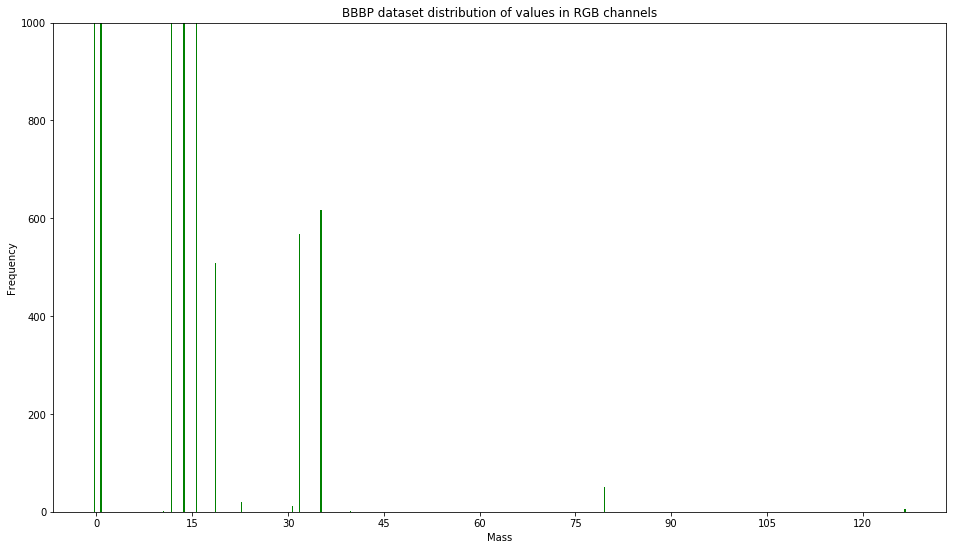

In [80]:
ax = plt.figure(figsize=(16,9)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.bar([x+0.3 for x in b_channel.keys()], [x for x in b_channel.values()], width=0.2, color='b',align='center')
plt.bar([x for x in r_channel.keys()], r_channel.values(), width=0.2, color='r',align='center')
plt.bar([x-0.3 for x in g_channel.keys()], g_channel.values(),width=0.2, color='g',align='center')
plt.ylim((0,1000))
plt.xlabel('Mass')
plt.ylabel('Frequency')
plt.title('BBBP dataset distribution of values in RGB channels')
#plt.show()
plt.savefig('BBBP_Dataset_Spectra_CU_2_g.png',dpi=300)

### script version!

DIVISION=4
do_Hdonors=True
ico_key_name="icosahedron_level4"
num_of_molecules_override=5
NUM_MAPS_PER_MOLECULE=65
sanitize=True
SMILES_array=SMILES_array
num_out_files=1
extra_augmentation=''
verbose=True
out_filename='TEST2'

if True:  
    if num_of_molecules_override == 0:
        # do all smiles woo
        Num_of_molecules= len(SMILES_array)
    else:
        Num_of_molecules = num_of_molecules_override
        
    smiles_count = Num_of_molecules
    smile_count = Num_of_molecules # yeah i know, is hacky
    


    if DIVISION == 1:
        NUM_FACES = 80
    elif DIVISION == 2:
        NUM_FACES = 320
    elif DIVISION == 3:
        NUM_FACES = 1280
    elif DIVISION == 4:
        NUM_FACES = 5120
        
    if NUM_MAPS_PER_MOLECULE == 1:
        NUM_UNWRAPPINGS_TO_DO = 1
        NUM_DIRECTIONS_TO_DO = 1
        NUM_EXTRA_MAPS_PER_MOLECULE = 0
    elif NUM_MAPS_PER_MOLECULE == 60:
        NUM_UNWRAPPINGS_TO_DO = 20
        NUM_DIRECTIONS_TO_DO = 3
        NUM_EXTRA_MAPS_PER_MOLECULE = 0
    elif NUM_MAPS_PER_MOLECULE > 60:
        # Currently assumes you want 60 plus extra
        NUM_UNWRAPPINGS_TO_DO = 20
        NUM_DIRECTIONS_TO_DO = 3
        NUM_EXTRA_MAPS_PER_MOLECULE = NUM_MAPS_PER_MOLECULE-60
        if verbose:
            print('Doing {} extra maps using {}s'.format(
                NUM_EXTRA_MAPS_PER_MOLECULE, 
                extra_augmentation))  
    
    if sanitize:
        print('Warning! Sanitize seems to muck up the structures, especially for protiens')
        print('Is good for SMILES string input however')
    
    outfile = h5py.File(os.path.join(save_dir,out_filename),"w")
    if NUM_EXTRA_MAPS_PER_MOLECULE > 0:
        outfile_expanded = h5py.File(os.path.join(save_dir,out_filename + '_extra_' + extra_augmentation),"w")
    string_type = h5py.string_dtype(encoding='utf-8')
    icosahedron_name = ico_key_name

    ##################### set up the out put datasets ################################
    ## this sets up the output datasets
    icosahedron_ds =  outfile.create_dataset(icosahedron_name, (smile_count*NUM_MAPS_PER_MOLECULE, NUM_FACES, 3))  
    #charge_ds = outfile.create_dataset("charge", (smile_count*NUM_MAPS_PER_MOLECULE,))
    molID_ds = outfile.create_dataset("molID", (smile_count*NUM_MAPS_PER_MOLECULE,))
    ## from the dataset
    compound_id_ds = outfile.create_dataset('Compound ID', (smile_count*NUM_MAPS_PER_MOLECULE,), dtype=string_type)
    esol_predicted_log_solubility_in_mols_per_litre_ds = outfile.create_dataset('ESOL predicted log solubility in mols per litre', (smile_count*NUM_MAPS_PER_MOLECULE,))
    minimum_degree_ds = outfile.create_dataset('Minimum Degree', (smile_count*NUM_MAPS_PER_MOLECULE,))
    molecular_weight_ds = outfile.create_dataset('Molecular Weight', (smile_count*NUM_MAPS_PER_MOLECULE,))
    number_of_h_bond_donors_ds = outfile.create_dataset('Number of H-Bond Donors', (smile_count*NUM_MAPS_PER_MOLECULE,))
    number_of_rings_ds = outfile.create_dataset('Number of Rings', (smile_count*NUM_MAPS_PER_MOLECULE,))
    number_of_rotatable_bonds_ds = outfile.create_dataset('Number of Rotatable Bonds', (smile_count*NUM_MAPS_PER_MOLECULE,))
    polar_surface_area_ds = outfile.create_dataset('Polar Surface Area', (smile_count*NUM_MAPS_PER_MOLECULE,))
    measured_log_solubility_in_mols_per_litre_ds = outfile.create_dataset('measured log solubility in mols per litre', (smile_count*NUM_MAPS_PER_MOLECULE,))
    smiles_ds = outfile.create_dataset('smiles', (smile_count*NUM_MAPS_PER_MOLECULE,), dtype=string_type)
    ### end from the dataset
    ### start calculated by rdkit
    num_atoms_ds = outfile.create_dataset("num_atoms", (smile_count*NUM_MAPS_PER_MOLECULE,))
    num_bonds_ds = outfile.create_dataset("num_bonds", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    num_heavy_atoms_ds = outfile.create_dataset("num_heavy_atoms", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    num_exact_Mol_Wt_ds = outfile.create_dataset("num_exact_Mol_Wt", (smile_count*NUM_MAPS_PER_MOLECULE,))
    MolLogP_ds = outfile.create_dataset("MolLogP", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    if do_Hdonors:
        num_H_acceptors_ds = outfile.create_dataset("num_H_acceptors", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
        num_H_donors_ds = outfile.create_dataset("num_H_donors", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    num_heteroatoms_ds = outfile.create_dataset("num_ heteroatoms", (smile_count*NUM_MAPS_PER_MOLECULE,))
    num_valence_electrons_ds = outfile.create_dataset("num_valence_electrons", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    PMI_1_ds = outfile.create_dataset("PMI_1", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    PMI_2_ds = outfile.create_dataset("PMI_2", (smile_count*NUM_MAPS_PER_MOLECULE,))
    PMI_3_ds = outfile.create_dataset("PMI_3", (smile_count*NUM_MAPS_PER_MOLECULE,))
    spherocity_ds = outfile.create_dataset("spherocity", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    asphericity_ds = outfile.create_dataset("asphericity", (smile_count*NUM_MAPS_PER_MOLECULE,))
    eccentricity_ds = outfile.create_dataset("eccentricity", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    inertial_shape_factor_ds = outfile.create_dataset("inertial_shape_factor", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    radius_of_gyration_ds = outfile.create_dataset("radius_of_gyration", (smile_count*NUM_MAPS_PER_MOLECULE,)) 
    # copied from output of df_maker above sigh
    ### end from the dataset
    
    ######################### start the loop ###################################
    ## Das Loop
    point_ptr = -1                                               
    for mol_idx in range(Num_of_molecules): 
        if mol_idx % 50 == 0:
            print('Got to Molecule no. ', mol_idx)
        ##### grab data from the dataframe
        current_row = df.loc[[mol_idx]]    
        ##### grab a molecule! #####################################
        m=Molecule(SMILES_array[mol_idx],sanitize=sanitize)
        tidy_m = m
        #tidy_m.molecule.UpdatePropertyCache() # this is now done in Molecule if you got SMILEs
        ############### put molecule in an icosasphere #############
        # puts the molecule into an icosasphere
        i = Ico(m,DIVISION)
        print(df['Compound ID'].iloc[mol_idx])
        if smiles_count > 0:
            smiles_string = SMILES_array[mol_idx]
        #############################################################################################
        ################################### THIS IS THE FIRST 60 NETS ###############################
        #############################################################################################
        for face_idx in range(NUM_UNWRAPPINGS_TO_DO): 
            for point_idx in range(NUM_DIRECTIONS_TO_DO): 
                point_ptr += 1
                #### create the map (this does not plot a graphics object)
                i.plot2D(first_face=face_idx, point_idx=point_idx);
                fs=i.get_face_list()
                #i.draw2D()
                #### ####### grab the atom values or colours or whatever############
                Face._lookup_func = Face.face_get_masses
                values = [f.get_values() for f in fs]
                ################ create the measurables you want to record #############
                values_as_array = np.array(values) # this is hte icosahedron stuff
                num_atoms = tidy_m.molecule.GetNumAtoms() # number of atoms
                num_bonds = tidy_m.molecule.GetNumBonds() # number of bonds
                num_heavy_atoms = tidy_m.molecule.GetNumHeavyAtoms() # number of non-hydrogens
                num_exact_Mol_Wt = Descriptors.ExactMolWt(tidy_m.molecule) # exact molar weight
                MolLogP = Descriptors.MolLogP(tidy_m.molecule, includeHs=True) # octanol / water partitian coefficient
                num_heteroatoms = Descriptors.NumHeteroatoms(tidy_m.molecule)
                num_valence_electrons = Descriptors.NumValenceElectrons(tidy_m.molecule)
                if do_Hdonors:
                    num_H_acceptors = Descriptors.NumHAcceptors(tidy_m.molecule)
                    num_H_donors = Descriptors.NumHDonors(tidy_m.molecule)
                PMI_1 = rdMolDescriptors.CalcPMI1(tidy_m.molecule) # principal moment of inertia 1 (smallest)
                PMI_2 = rdMolDescriptors.CalcPMI2(tidy_m.molecule) # principal moment of inertia 2
                PMI_3 = rdMolDescriptors.CalcPMI3(tidy_m.molecule) # principal moment of inertia 3
                spherocity = rdMolDescriptors.CalcSpherocityIndex(tidy_m.molecule)
                asphericity = rdMolDescriptors.CalcAsphericity(tidy_m.molecule)
                eccentricity = rdMolDescriptors.CalcEccentricity(tidy_m.molecule)
                inertial_shape_factor = rdMolDescriptors.CalcInertialShapeFactor(tidy_m.molecule)
                radius_of_gyration = rdMolDescriptors.CalcRadiusOfGyration(tidy_m.molecule)

                ############ assign measurabless to columns ##########################
                ###### assign unfolding net
                icosahedron_ds[point_ptr] = values_as_array 
                #charge_ds[point_ptr] = charge
                molID_ds[point_ptr] = mol_idx
                ###### assign stuff from the database
                compound_id = current_row.iloc[0]['Compound ID']
                compound_id_ds[point_ptr] = compound_id
                esol_predicted_log_solubility_in_mols_per_litre = current_row.iloc[0]['ESOL predicted log solubility in mols per litre']
                esol_predicted_log_solubility_in_mols_per_litre_ds[point_ptr] = esol_predicted_log_solubility_in_mols_per_litre
                minimum_degree = current_row.iloc[0]['Minimum Degree']
                minimum_degree_ds[point_ptr] = minimum_degree
                molecular_weight = current_row.iloc[0]['Molecular Weight']
                molecular_weight_ds[point_ptr] = molecular_weight
                number_of_h_bond_donors = current_row.iloc[0]['Number of H-Bond Donors']
                number_of_h_bond_donors_ds[point_ptr] = number_of_h_bond_donors
                number_of_rings = current_row.iloc[0]['Number of Rings']
                number_of_rings_ds[point_ptr] = number_of_rings
                number_of_rotatable_bonds = current_row.iloc[0]['Number of Rotatable Bonds']
                number_of_rotatable_bonds_ds[point_ptr] = number_of_rotatable_bonds
                polar_surface_area = current_row.iloc[0]['Polar Surface Area']
                polar_surface_area_ds[point_ptr] = polar_surface_area
                measured_log_solubility_in_mols_per_litre = current_row.iloc[0]['measured log solubility in mols per litre']
                measured_log_solubility_in_mols_per_litre_ds[point_ptr] = measured_log_solubility_in_mols_per_litre
                smiles = current_row.iloc[0]['smiles']
                smiles_ds[point_ptr] = smiles
                ######## assign stuff you calculated ######
                num_atoms_ds[point_ptr] = num_atoms  
                num_bonds_ds[point_ptr] = num_bonds 
                num_heavy_atoms_ds[point_ptr] =  num_heavy_atoms 
                num_exact_Mol_Wt_ds[point_ptr] =  num_exact_Mol_Wt
                MolLogP_ds[point_ptr] =  MolLogP 
                if do_Hdonors:
                    num_H_acceptors_ds[point_ptr] =  num_H_acceptors 
                    num_H_donors_ds[point_ptr] =  num_H_donors 
                num_heteroatoms_ds[point_ptr] =  num_heteroatoms
                num_valence_electrons_ds[point_ptr] =  num_valence_electrons 
                PMI_1_ds[point_ptr] =  PMI_1 
                PMI_2_ds[point_ptr] =  PMI_2
                PMI_3_ds[point_ptr] =  PMI_3
                spherocity_ds[point_ptr] =  spherocity 
                asphericity_ds[point_ptr] =  asphericity
                eccentricity_ds[point_ptr] =  eccentricity 
                inertial_shape_factor_ds[point_ptr] =  inertial_shape_factor 
                radius_of_gyration_ds[point_ptr] =  radius_of_gyration 
        if verbose:
            print('Finished the 60 standard unfoldings')
        #############################################################################################
        ######################## THE EXTRA AUGMENTATION STARTS HERE !################################
        #############################################################################################
        for extra_idx in range(NUM_EXTRA_MAPS_PER_MOLECULE):
            ## this is it, regen the molecule each time you unwrap to move it about a bit!
            m=Molecule(SMILES_array[mol_idx],sanitize=sanitize)
            print(m.molecule)
            tidy_m = m
            for point_idx in range(1): # hacky cos I didn't want to indent!!!!!
                # we pick the face and direction randomly for this single unfolding
                face_idx = random.choices([x for x in range(NUM_UNWRAPPINGS_TO_DO)], k=1)[0]
                point_idx = random.choices([x for x in range(NUM_DIRECTIONS_TO_DO)], k=1)[0]
                if verbose:
                    print('Doing extra: face {}, direction {}'.format(face_idx, point_idx))
                point_ptr += 1
                #### create the map (this does not plot a graphics object)
                i.plot2D(first_face=face_idx, point_idx=point_idx);
                fs=i.get_face_list()
                #i.draw2D()
                #### ####### grab the atom values or colours or whatever############
                Face._lookup_func = Face.face_get_masses
                values = [f.get_values() for f in fs]
                ################ create the measurables you want to record #############
                values_as_array = np.array(values) # this is hte icosahedron stuff
                num_atoms = tidy_m.molecule.GetNumAtoms() # number of atoms
                num_bonds = tidy_m.molecule.GetNumBonds() # number of bonds
                num_heavy_atoms = tidy_m.molecule.GetNumHeavyAtoms() # number of non-hydrogens
                num_exact_Mol_Wt = Descriptors.ExactMolWt(tidy_m.molecule) # exact molar weight
                MolLogP = Descriptors.MolLogP(tidy_m.molecule, includeHs=True) # octanol / water partitian coefficient
                num_heteroatoms = Descriptors.NumHeteroatoms(tidy_m.molecule)
                num_valence_electrons = Descriptors.NumValenceElectrons(tidy_m.molecule)
                if do_Hdonors:
                    num_H_acceptors = Descriptors.NumHAcceptors(tidy_m.molecule)
                    num_H_donors = Descriptors.NumHDonors(tidy_m.molecule)
                PMI_1 = rdMolDescriptors.CalcPMI1(tidy_m.molecule) # principal moment of inertia 1 (smallest)
                PMI_2 = rdMolDescriptors.CalcPMI2(tidy_m.molecule) # principal moment of inertia 2
                PMI_3 = rdMolDescriptors.CalcPMI3(tidy_m.molecule) # principal moment of inertia 3
                spherocity = rdMolDescriptors.CalcSpherocityIndex(tidy_m.molecule)
                asphericity = rdMolDescriptors.CalcAsphericity(tidy_m.molecule)
                eccentricity = rdMolDescriptors.CalcEccentricity(tidy_m.molecule)
                inertial_shape_factor = rdMolDescriptors.CalcInertialShapeFactor(tidy_m.molecule)
                radius_of_gyration = rdMolDescriptors.CalcRadiusOfGyration(tidy_m.molecule)

                ############ assign measurabless to columns ##########################
                ###### assign unfolding net
                icosahedron_ds[point_ptr] = values_as_array 
                #charge_ds[point_ptr] = charge
                molID_ds[point_ptr] = mol_idx
                ###### assign stuff from the database
                compound_id = current_row.iloc[0]['Compound ID']
                compound_id_ds[point_ptr] = compound_id
                esol_predicted_log_solubility_in_mols_per_litre = current_row.iloc[0]['ESOL predicted log solubility in mols per litre']
                esol_predicted_log_solubility_in_mols_per_litre_ds[point_ptr] = esol_predicted_log_solubility_in_mols_per_litre
                minimum_degree = current_row.iloc[0]['Minimum Degree']
                minimum_degree_ds[point_ptr] = minimum_degree
                molecular_weight = current_row.iloc[0]['Molecular Weight']
                molecular_weight_ds[point_ptr] = molecular_weight
                number_of_h_bond_donors = current_row.iloc[0]['Number of H-Bond Donors']
                number_of_h_bond_donors_ds[point_ptr] = number_of_h_bond_donors
                number_of_rings = current_row.iloc[0]['Number of Rings']
                number_of_rings_ds[point_ptr] = number_of_rings
                number_of_rotatable_bonds = current_row.iloc[0]['Number of Rotatable Bonds']
                number_of_rotatable_bonds_ds[point_ptr] = number_of_rotatable_bonds
                polar_surface_area = current_row.iloc[0]['Polar Surface Area']
                polar_surface_area_ds[point_ptr] = polar_surface_area
                measured_log_solubility_in_mols_per_litre = current_row.iloc[0]['measured log solubility in mols per litre']
                measured_log_solubility_in_mols_per_litre_ds[point_ptr] = measured_log_solubility_in_mols_per_litre
                smiles = current_row.iloc[0]['smiles']
                smiles_ds[point_ptr] = smiles
                ######## assign stuff you calculated ######
                num_atoms_ds[point_ptr] = num_atoms  
                num_bonds_ds[point_ptr] = num_bonds 
                num_heavy_atoms_ds[point_ptr] =  num_heavy_atoms 
                num_exact_Mol_Wt_ds[point_ptr] =  num_exact_Mol_Wt
                MolLogP_ds[point_ptr] =  MolLogP 
                if do_Hdonors:
                    num_H_acceptors_ds[point_ptr] =  num_H_acceptors 
                    num_H_donors_ds[point_ptr] =  num_H_donors 
                num_heteroatoms_ds[point_ptr] =  num_heteroatoms
                num_valence_electrons_ds[point_ptr] =  num_valence_electrons 
                PMI_1_ds[point_ptr] =  PMI_1 
                PMI_2_ds[point_ptr] =  PMI_2
                PMI_3_ds[point_ptr] =  PMI_3
                spherocity_ds[point_ptr] =  spherocity 
                asphericity_ds[point_ptr] =  asphericity
                eccentricity_ds[point_ptr] =  eccentricity 
                inertial_shape_factor_ds[point_ptr] =  inertial_shape_factor 
                radius_of_gyration_ds[point_ptr] =  radius_of_gyration 


    outfile.close()   
    #outfile_expanded.close()
    i.draw2D()